In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
asset = pd.read_csv("MP_ASSET.csv",index_col=0)

In [3]:
asset_list = asset.drop_duplicates(subset="MP_asset_symbol")["MP_asset_symbol"].tolist()

In [4]:
asset = pd.read_csv("MP_ASSET.csv",index_col=0)
asset_list
args={
      "future_interval":100,
      "future_price_percent_movement":200,      
     }

In [5]:
asset_list

['wrapped-bitcoin',
 'weth',
 'juno-network',
 'secret',
 'tether',
 'dai',
 'cosmos',
 'crypto-com-chain',
 'evmos',
 'stargaze',
 'osmosis',
 'usd-coin']

In [296]:
for a in asset_list:
    work_asset = asset.loc[asset["MP_asset_symbol"]==a]
    asset = asset.drop(work_asset.index,axis=0)
    desired_price = work_asset["MP_price_in_stable"][-1:]*(args["future_price_percent_movement"]/100)
    interest = float((desired_price/work_asset["MP_price_in_stable"][-1:])**(1/args["future_interval"])-1)
    for i in range(args["future_interval"]):
        period = work_asset.iloc[-args["moving_interval"]:]
        next_period = period["MP_price_in_stable"].mean()
       # next_period = next_period + next_period*((args["future_price_percent_movement"]/100/args["future_interval"])) + next_period*np.random.normal(scale=args["noise_std"])*args["noise_weight"] 
        next_period = next_period*(1 + interest) + np.random.normal(scale=args["noise_std"])*args["noise_weight"] 

        next_date = period["MP_timestamp"].max()
        next_date = datetime.strftime(pd.to_datetime(next_date) + timedelta(days=1),format="%Y-%m-%d")
        next_record = pd.DataFrame({"MP_timestamp":[next_date],"MP_asset_symbol":[a],"MP_price_in_stable":[next_period]})
        work_asset = pd.concat([work_asset,next_record],axis=0).reset_index(drop=True)
    asset = pd.concat([asset,work_asset],axis=0).reset_index(drop=True)
asset

TypeError: only size-1 arrays can be converted to Python scalars

In [9]:
import numpy as np
import matplotlib.pyplot as plt

args={
      "future_interval":90,
      "future_price_percent_movement":150,      
     }

def gbm_simulation_positive(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    W = np.random.standard_normal(size=N+1)
    W = np.cumsum(W) * np.sqrt(dt)
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = sigma * W
    S = S0 * np.exp(drift + diffusion)
    return S

def gbm_simulation_negative(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    W = np.random.standard_normal(size=N+1)
    W = np.cumsum(W) * np.sqrt(dt)
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = sigma * W
    S = S0 * np.exp(drift - diffusion)
    return S


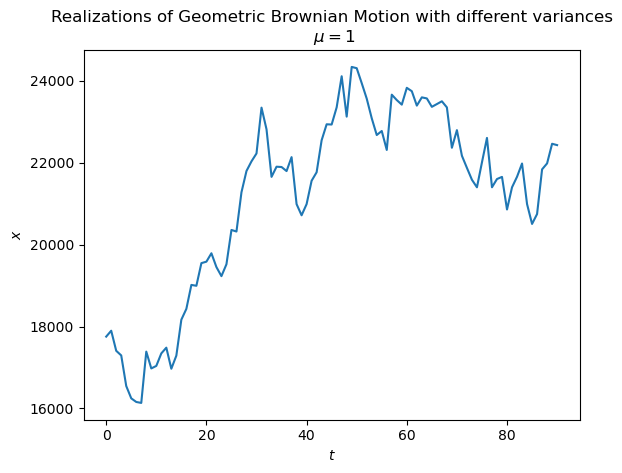

In [6]:

desired_growth = float(args["future_price_percent_movement"])/100 
desired_period = float(args["future_interval"])
dayli_growth_rate = (1 + desired_growth)**(1/desired_period) - 1
Annual_growth_rate = ((1 + dayli_growth_rate)**365 - 1)/100


S0 = 18000  # initial price
mu = Annual_growth_rate  # expected annual growth rate
sigma = 0.250  # volatility
T = 1  # time horizon (in years)
N = 90  # number of time steps (assuming daily prices)


prices_positive = gbm_simulation_positive(S0, mu, sigma, T, N)
prices_negative = gbm_simulation_negative(S0, -mu, sigma, T, N)

plt.plot(prices_positive)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()


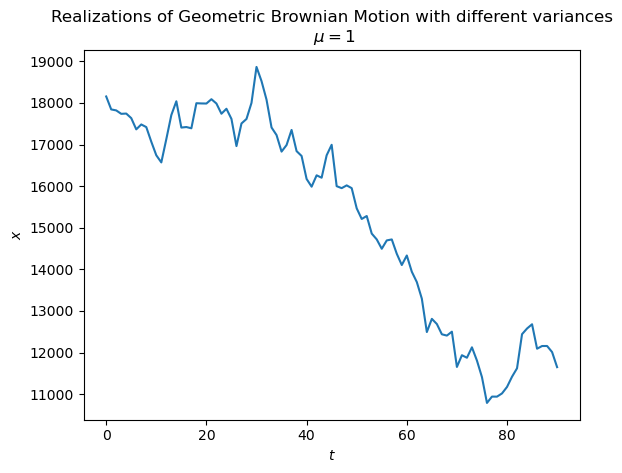

In [7]:

plt.plot(prices_negative)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)
plt.show()

In [8]:
Annual_growth_rate



0.40102459771087445

In [34]:
asset = pd.read_csv("MP_ASSET.csv",index_col=0)
mu = 0
sigma = 0.005
T = 1  #time horizon in years
N = 731
for a in asset_list:
    work_asset = asset.loc[asset["MP_asset_symbol"]==a]
    asset = asset.drop(work_asset.index,axis=0)
    S0 = float(work_asset.loc[work_asset["MP_timestamp"]==work_asset["MP_timestamp"].max(),"MP_price_in_stable"])
    prices_positive = gbm_simulation_positive(S0, mu, sigma, T, N)
    prices_negative = gbm_simulation_negative(S0, -mu, sigma, T, N)
    next_date = pd.to_datetime(work_asset["MP_timestamp"].max()) + timedelta(days=int(args["future_interval"]))
    next_date = pd.date_range(start=work_asset["MP_timestamp"].max(), end=datetime.strftime(next_date,format="%Y-%m-%d"))
    next_date = next_date.astype("str")
    next_record = pd.DataFrame({"MP_timestamp":next_date,"MP_asset_symbol":a,"MP_price_in_stable":prices_negative})
    work_asset = pd.concat([work_asset,next_record],axis=0).reset_index(drop=True)
    asset = pd.concat([asset,work_asset],axis=0).reset_index(drop=True)

17434.58996729651
2023-04-11 00:00:00
DatetimeIndex(['2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14',
               '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18',
               '2023-01-19', '2023-01-20', '2023-01-21', '2023-01-22',
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30',
               '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03',
               '2023-02-04', '2023-02-05', '2023-02-06', '2023-02-07',
               '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-11',
               '2023-02-12', '2023-02-13', '2023-02-14', '2023-02-15',
               '2023-02-16', '2023-02-17', '2023-02-18', '2023-02-19',
               '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27',
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-0

In [21]:
asset[["MP_timestamp","MP_price_in_stable"]]


MP_timestamp  MP_price_in_stable
0              2021-01-11        38495.967310
1              2021-01-12        35653.625376
2              2021-01-13        33939.863042
3              2021-01-14        37431.276549
4              2021-01-15        39388.971486
...                   ...                 ...
8575  2023-04-07 00:00:00            1.001312
8576  2023-04-08 00:00:00            1.002267
8577  2023-04-09 00:00:00            1.002191
8578  2023-04-10 00:00:00            1.002697
8579  2023-04-11 00:00:00            1.002637

[8580 rows x 2 columns]

<AxesSubplot:>

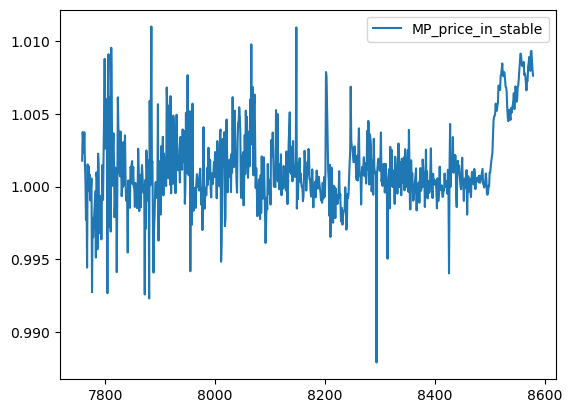

In [11]:
asset.loc[asset["MP_asset_symbol"]=="usd-coin"].plot()

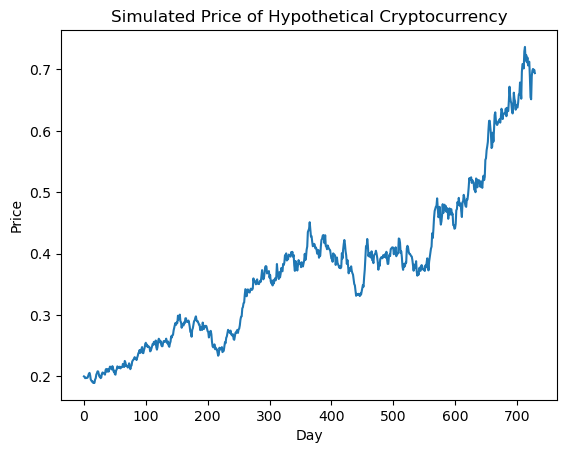

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set initial parameters
starting_price = 0.20
daily_return_mean = 0.001
daily_return_std = 0.02
compound_interest_rate = 0.0002
aave_interest_rate = 0.0003
days = 2 * 365

# Generate daily returns and simulate price
daily_returns = np.random.normal(daily_return_mean, daily_return_std, days)
price = np.zeros(days)
price[0] = starting_price

for i in range(1, days):
    # Calculate daily price change
    price_change = price[i-1] * daily_returns[i]

    # Calculate daily interest earned from lending pool
    compound_interest = price[i-1] * compound_interest_rate
    aave_interest = price[i-1] * aave_interest_rate

    # Calculate new price
    price[i] = price[i-1] + price_change + compound_interest + aave_interest

# Plot the simulated price
plt.plot(price)
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Simulated Price of Hypothetical Cryptocurrency')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'AAVE-USD.csv'

In [83]:
from statistics import mea

In [5]:
args

{'N': 731,
 'new_LS_opened_type': 'function',
 'new_LS_opened_daily_count': 'LS_tf.csv',
 'new_LP_opened_daily_count': 'LP_tf.csv',
 'Active_Assets': ['wrapped-bitcoin',
  'weth',
  'juno-network',
  'secret',
  'usd-coin',
  'tether',
  'dai',
  'cosmos',
  'crypto-com-chain',
  'evmos',
  'stargaze',
  'osmosis'],
 'Active_Assets_Distribution': [0.3,
  0.15,
  0.075,
  0.075,
  0,
  0,
  0.05,
  0.1,
  0.05,
  0.05,
  0.05,
  0.1],
 'Pool_Assets': ['usd-coin', 'tether'],
 'seed': 32,
 'LS_loan_amnt_asset_stable_df_num': 10,
 'LS_loan_amnt_asset_stable_df_den': 20,
 'LS_loan_amnt_asset_stable_min': 100,
 'LS_loan_amnt_asset_stable_max': 15000,
 'LS_loan_amnt_asset_stable_multiplyer': 5000,
 'LS_cltr_amnt_asset_df_num': 10,
 'LS_cltr_amnt_asset_df_den': 20,
 'LS_cltr_amnt_asset_min': 1.3,
 'LS_cltr_amnt_asset_max': 1.6,
 'SYS_LS_expected_penalty_df_num': 1,
 'SYS_LS_expected_penalty_df_den': 1,
 'SYS_LS_expected_payment_min': 1,
 'SYS_LS_expected_payment_max': 12,
 'SYS_LS_expected_pay

In [8]:
import json
MP_Asset = pd.read_csv("MP_ASSET.csv",index_col=0)
with open("config.json", 'r') as f:
    args = json.load(f)
np.random.seed(300)



In [5]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from statistics import mean

def gbm_simulation_positive(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    W = np.random.standard_normal(size=N+1)
    W = np.cumsum(W) * np.sqrt(dt)
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = sigma * W
    S = S0 * np.exp(drift + diffusion)
    return S

def gbm_simulation_negative(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    W = np.random.standard_normal(size=N+1)
    W = np.cumsum(W) * np.sqrt(dt)
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = sigma * W
    S = S0 * np.exp(drift - diffusion)
    return S


def prompt_future_distributions(MP_Asset,args,seed):
    asset = MP_Asset
    asset_list = asset.drop_duplicates(subset="MP_asset_symbol")["MP_asset_symbol"].loc[~asset["MP_asset_symbol"].isin(args["Pool_Assets"])].tolist()
    desired_growth = float(args["future_percent_growth"]) / 100
    desired_period = float(args["future_interval"])
    dayli_growth_rate = (1 + desired_growth) ** (1 / desired_period) - 1
    Annual_growth_rate = ((1 + dayli_growth_rate) ** 365 - 1) / 100

    mu = Annual_growth_rate
    sigma = args["future_volatility"]
    T = 1  #time horizon in years
    N = args["future_interval"]
    np.random.seed(seed)
    for a in asset_list:
        work_asset = asset.loc[asset["MP_asset_symbol"] == a]
        asset = asset.drop(work_asset.index, axis=0)
        S0 = float(work_asset.loc[work_asset["MP_timestamp"] == work_asset["MP_timestamp"].max(), "MP_price_in_stable"])
        if args["future_percent_growth"] >= 0:
            prices = gbm_simulation_positive(S0, mu, sigma, T, N)
            while prices[-1] < (prices[0]+((args["future_percent_growth"]/100) - 0.1)*prices[0]) or prices[-1] > (prices[0]+((args["future_percent_growth"]/100) + 0.1)*prices[0]):
                print("first:",prices[0])
                print("last:",prices[-1])
                prices = gbm_simulation_positive(S0, mu, sigma, T, N)

        else:
            prices = gbm_simulation_negative(S0, mu, sigma, T, N)
            while max(prices[1:]) > prices[0]:
                prices = gbm_simulation_negative(S0, mu, sigma, T, N)

        next_date = pd.to_datetime(work_asset["MP_timestamp"].max()) + timedelta(days=int(args["future_interval"]))
        next_date = pd.date_range(start=work_asset["MP_timestamp"].max(), end=datetime.strftime(next_date,format="%Y-%m-%d"))
        next_date = next_date.astype("str")
        next_record = pd.DataFrame({"MP_timestamp":next_date,"MP_asset_symbol":a,"MP_price_in_stable":prices})
        work_asset = pd.concat([work_asset, next_record], axis=0).reset_index(drop=True)
        asset = pd.concat([asset, work_asset], axis=0).reset_index(drop=True)
    mu = 0
    sigma = 0.005
    T = 1  #time horizon in years
    N = args["future_interval"]

    stable_asset_list = MP_Asset.drop_duplicates(subset="MP_asset_symbol")["MP_asset_symbol"].loc[MP_Asset["MP_asset_symbol"].isin(args["Pool_Assets"])].tolist()
    for a in stable_asset_list:
        work_asset = asset.loc[asset["MP_asset_symbol"] == a]
        asset = asset.drop(work_asset.index, axis=0)
        S0 = float(work_asset.loc[work_asset["MP_timestamp"] == work_asset["MP_timestamp"].max(), "MP_price_in_stable"])
        if args["future_percent_growth"] >= 0:
            prices = gbm_simulation_positive(S0, mu, sigma, T, N)
        else:
            prices = gbm_simulation_negative(S0, mu, sigma, T, N)
        next_date = pd.to_datetime(work_asset["MP_timestamp"].max()) + timedelta(days=int(args["future_interval"]))
        next_date = pd.date_range(start=work_asset["MP_timestamp"].max(), end=datetime.strftime(next_date,format="%Y-%m-%d"))
        next_date = next_date.astype("str")
        next_record = pd.DataFrame({"MP_timestamp":next_date,"MP_asset_symbol":a,"MP_price_in_stable":prices})
        work_asset = pd.concat([work_asset, next_record], axis=0).reset_index(drop=True)
        asset = pd.concat([asset, work_asset], axis=0).reset_index(drop=True)
    MP_Asset = asset
    return MP_Asset


In [6]:
import json
seed = 3643537
simulations = 200
with open("config.json", 'r') as f:
    args = json.load(f)
sim_result = pd.DataFrame()
for i in range(simulations):
    MP_Asset = pd.read_csv("MP_ASSET.csv",index_col=0)
    print(MP_Asset["MP_timestamp"].max())
    MP_Asset = prompt_future_distributions(MP_Asset,args,seed)
    if i==0:
        sim_result["MP_timestamp"] = MP_Asset["MP_timestamp"]
        sim_result["MP_asset_symbol"] = MP_Asset["MP_asset_symbol"]
        sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
    else:
        sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]

    seed = seed+200

2023-01-11
first: 17317.070314969085
last: 14084.877342736832
first: 17040.250642937728
last: 15948.060181312938
first: 17142.933993166105
last: 20873.85256319112
first: 17998.151853824897
last: 18559.15242871488
first: 17737.159990179982
last: 20372.209725990146
first: 18522.726572602962
last: 18538.41688161511
first: 17144.426494048163
last: 19020.174939248256
first: 18067.715665503107
last: 19167.42812776195
first: 17178.846551542916
last: 24271.830002546085
first: 18689.048913245522
last: 13075.635256745056
first: 18119.9998288827
last: 15639.071442012755
first: 15690.723788811973
last: 16199.3071397526
first: 16545.92396109515
last: 19398.098436631553
first: 17407.49362772353
last: 28937.843512316744
first: 17490.94929977677
last: 22690.67145651568
first: 1276.0627891178538
last: 1330.6947078680678
first: 1411.5806357396118
last: 733.2081507021763
first: 1429.1453361155857
last: 955.1619620838987
first: 1372.285356050204
last: 1523.6170197405606
first: 1260.1510225882712
last: 229

first: 0.6900449982053031
last: 0.5837271607922261
first: 0.6981193288393651
last: 0.8733774899532117
first: 0.7354887527056829
last: 0.5310308088264728
first: 0.7218932201704551
last: 0.5718480114002017
first: 0.7111205210325614
last: 0.8354034240429362
first: 0.7125908252710039
last: 0.8639468985544835
first: 0.7288868354341632
last: 0.7292289389546153
first: 0.7376526877236872
last: 0.6861767501871157
first: 0.7197521173963
last: 0.2908692195845525
first: 0.7092597021438145
last: 0.9195000973327718
first: 0.7095702185447238
last: 1.7448488035510044
first: 1.0346528696742552
last: 0.6686509450652901
first: 1.042617790740419
last: 1.3848734932420688
first: 0.9617114910124125
last: 0.6141991746108819
first: 1.0369992836436674
last: 2.534427090512635
first: 0.9810435918214012
last: 2.500174897713437
first: 1.0381797645940172
last: 1.5235913782513306
first: 1.0361147947354457
last: 0.45913370752637317
first: 1.0031500487615266
last: 1.321663072622141
first: 0.9605935472153347
last: 1.553

first: 0.7085210434013683
last: 0.32143305268808214
first: 1.0402585572537013
last: 1.3741149501159444
first: 1.0399194384265062
last: 0.6422617196842844
first: 0.9866778564676655
last: 1.3630485475891854
first: 0.9595403631296937
last: 1.7896040183364237
first: 0.989823937141126
last: 0.8400445631882534
first: 0.8814121924105706
last: 2.4997611235329917
first: 1.083056157561122
last: 0.5707790985775492
first: 0.9605710738010323
last: 0.8309158924297977
first: 0.9702677200067747
last: 1.8252982251887446
first: 1.0367492023985807
last: 1.1579519479479528
first: 0.9253350712406245
last: 0.6242638802222682
first: 1.043318152944168
last: 0.4218755417746768
first: 0.9868197696810188
last: 0.7550949532825969
first: 1.0462355747591672
last: 0.9765450540442948
first: 1.0242814114839562
last: 0.6854427949552259
first: 1.0619585310435136
last: 1.4265947028548744
first: 1.070261008307255
last: 1.5456173455214377
first: 1.0134148987043854
last: 0.9264781356406641
first: 1.0155548513189059
last: 1.

first: 0.02743079047738921
last: 0.03674237816125997
first: 0.024505702810264717
last: 0.02601271882074056
first: 0.024958396407599826
last: 0.020865132688914004
first: 0.02579324940267081
last: 0.042169412637252636
first: 0.024581937533538684
last: 0.02746073771817518
first: 0.024671971430715114
last: 0.028598087994494224
first: 0.026431250626770996
last: 0.0853783037887645
first: 0.027592470518964372
last: 0.01881053885356565
first: 0.027396940157502638
last: 0.06801826929051127
first: 0.02547808158314066
last: 0.04763518295945031
first: 0.027607358644786646
last: 0.023135798338852168
first: 0.02837304676094849
last: 0.04628152023960367
first: 0.028585631378563757
last: 0.042639238721581256
first: 0.026425468973078205
last: 0.014413496360896607
first: 0.0257879934849316
last: 0.030755297510879694
first: 0.0267514249694715
last: 0.024814652927791378
first: 0.026338109285577744
last: 0.04485927717017906
first: 0.026649102283004402
last: 0.02580666347546577
first: 0.026507820499999706
l

2023-01-11
first: 16889.96435051296
last: 42692.30441669266
first: 17620.960901885548
last: 12793.859708439177
first: 16868.517338783196
last: 20556.89030784401
first: 18521.08253974937
last: 17147.227892212886
first: 17133.287268752232
last: 15298.956368447993
first: 17604.20000739888
last: 27602.957706303325
first: 17183.417715908003
last: 23975.660405837527
first: 18636.503146881758
last: 23142.1193061793
first: 17475.761192286634
last: 18045.000430307187
first: 17228.212528545522
last: 17105.818400968412
first: 17526.87854413059
last: 22626.45344231453
first: 17472.668262993437
last: 10658.021220754881
first: 17054.469614458787
last: 20286.113408862155
first: 16918.983896544938
last: 11974.978477033474
first: 16399.388709678296
last: 14241.802215444612
first: 16779.011917556065
last: 16707.611873762806
first: 17872.639395410224
last: 15433.209054890563
first: 15867.271452382414
last: 10024.260724672718
first: 19819.847718229164
last: 30915.66628845213
first: 17718.159939259298
last

first: 11.337999072089007
last: 21.216932523299135
first: 10.766861050017189
last: 7.452923904998227
first: 10.937039150291259
last: 9.437783448648087
first: 11.655825898444881
last: 9.641708243127649
first: 11.838269407663535
last: 13.573533719993364
first: 11.320814552138113
last: 20.721868353772344
first: 11.274787387154541
last: 7.042875323885508
first: 12.071186102522534
last: 14.767081246092307
first: 11.539002326557837
last: 14.302917218536102
first: 11.498025274464593
last: 16.19772794342853
first: 11.605127339543873
last: 18.9342492976182
first: 11.121806518761746
last: 17.564564779880005
first: 11.175753253048839
last: 11.131809230634094
first: 10.58558264338353
last: 22.934543847457274
first: 11.837190465396324
last: 16.377880569557814
first: 11.350496364085302
last: 10.997141414143632
first: 10.717099410080467
last: 9.540115504672253
first: 11.022797165186468
last: 4.446299675968738
first: 11.026300696942132
last: 17.652578198586117
first: 11.832697912273547
last: 14.429974

first: 0.7266980899330018
last: 0.5609065314334637
first: 0.7696227061764132
last: 0.5515736450514396
first: 0.7501847592063365
last: 0.6681067428987211
first: 0.7536275160174404
last: 1.0392376822910938
first: 0.781270648285722
last: 0.9416631337513843
first: 0.7025326923362045
last: 0.4907640322406992
first: 0.7664285834697364
last: 0.7952735957953142
first: 0.7698109426380534
last: 0.7441502777578637
first: 0.7407257042507537
last: 1.2613968522254597
first: 0.7722666972729233
last: 0.6238164354171785
first: 0.7313218563437313
last: 2.02644794130791
first: 0.7835733496448756
last: 0.592655852879056
first: 0.8937934078571874
last: 1.4577078763474018
first: 0.7109225823370231
last: 1.5107059901624706
first: 0.8304210763966606
last: 1.5293182615974064
first: 0.7583980210046802
last: 1.3204468369961542
first: 0.773894770056829
last: 0.6645828710292937
first: 0.7553614351089372
last: 0.7819589319330509
first: 0.7580297426565535
last: 0.7655378397197755
first: 0.7750610816833002
last: 1.10

first: 15700.393174120463
last: 24585.61773112251
first: 19249.973607724816
last: 14758.796901429465
first: 17884.89150660084
last: 32029.678892719527
first: 17509.559527459016
last: 12875.997521244333
first: 17376.39288518597
last: 30703.761515114067
first: 16842.692097264036
last: 18692.310389226364
first: 16506.21912403219
last: 28887.18435668229
first: 18103.407384932754
last: 10662.898028155152
first: 17003.51148217525
last: 31551.81833528892
first: 17578.65989995984
last: 15981.189544630375
first: 16388.798246706312
last: 29251.63294137165
first: 16678.024742719463
last: 15249.99175086684
first: 16887.687652574146
last: 9550.216683274308
first: 17871.387663477013
last: 8008.02333282119
first: 15725.20947368904
last: 15983.670405700079
first: 16838.13445364469
last: 8192.229468184514
first: 17188.85981188228
last: 15982.421116066049
first: 17542.84772516081
last: 19214.298804049788
first: 16497.03006576504
last: 23408.665755593658
first: 17155.38724080197
last: 22742.287266296986


first: 0.06216154098778864
last: 0.08000924271851706
first: 0.06478192087832058
last: 0.05436488383138778
first: 0.06432113406625967
last: 0.10447058384447558
first: 0.06013981700683559
last: 0.06679355892860082
first: 0.06989169061966777
last: 0.07487643316824025
first: 0.06334930294446821
last: 0.21656681528123314
first: 0.06480093345072696
last: 0.07298391055125059
first: 0.06392818103273092
last: 0.10799338349924252
first: 0.06666087767802914
last: 0.059835588009305225
first: 0.06672867576603013
last: 0.03663922669037248
first: 0.06234136260073857
last: 0.07328657940837198
first: 0.06509995139812423
last: 0.09359362660428916
first: 0.06366909791129971
last: 0.06596288201640413
first: 0.06739719272402862
last: 0.07790424448006698
first: 0.06075684308167708
last: 0.023276621943520776
first: 0.06075409067177104
last: 0.10442442823766693
first: 0.06280184151195961
last: 0.1015460377018873
first: 0.06557504824373088
last: 0.10268621489481553
first: 0.06254990135360432
last: 0.0938130828

first: 0.02591053271324085
last: 0.028485023493780497
first: 0.026416615507661254
last: 0.015532306437604887
first: 0.026278429240713875
last: 0.042354950138733805
first: 0.02658993521458183
last: 0.015061620084737038
first: 0.027626728956218385
last: 0.061500880062011716
first: 0.025343259904127488
last: 0.018729706614166175
first: 0.027077096008868304
last: 0.03431980753421598
first: 0.026670039156302335
last: 0.06298015134602068
first: 0.025513420851819967
last: 0.02658149864444128
first: 0.026945622568785695
last: 0.018332450325630894
first: 0.02824085686117177
last: 0.04127462414941907
first: 0.024525533928397333
last: 0.026813522213185417
first: 0.026433926671862066
last: 0.021263993441149147
first: 0.02732620452313656
last: 0.018950898666139956
first: 0.02666234564891976
last: 0.04278157537933446
first: 0.025499150163313274
last: 0.023821222551816137
first: 0.024637733205809437
last: 0.020150876905783908
first: 0.025930716937020832
last: 0.022263788898971237
first: 0.02615378760

first: 0.7370797657750003
last: 0.3123399119518445
first: 0.8184188982791649
last: 0.7256587726096861
first: 0.7548002737985042
last: 1.8098280424832822
first: 0.7307737472566852
last: 0.7470727250581903
first: 0.787808558352416
last: 1.9509451605853685
first: 0.7710138534375814
last: 0.856339213021705
first: 0.8057402085909047
last: 0.8695492286915462
first: 0.8094910260690041
last: 0.8652016995667965
first: 0.7499076110507541
last: 0.837784528897123
first: 0.7341757511793758
last: 0.42448857641588517
first: 0.782956802157904
last: 1.9405224032168367
first: 0.7899387903801511
last: 0.5691980140936553
first: 0.8073713283592372
last: 2.242223375581677
first: 0.8020265288686311
last: 2.0869020562476615
first: 0.8328880783362215
last: 1.5423318594210171
first: 0.7783662341547695
last: 0.623548122404933
first: 0.8014880073790952
last: 0.7792692544308933
first: 0.7567049710505852
last: 0.8203680513086667
first: 0.7224431367050782
last: 0.4193998546111655
first: 0.7872251489379237
last: 0.83

2023-01-11
first: 16320.118650304365
last: 21309.31345093302
first: 18263.691075476454
last: 20364.374595455018
first: 16019.56082739938
last: 10694.08375250463
first: 17372.99453304746
last: 12106.246947126368
first: 17568.777513992052
last: 15766.572673716913
first: 18446.481755203833
last: 16083.420303188981
first: 17541.227173256786
last: 26384.3355551084
first: 17715.8448312465
last: 49768.66953420462
first: 17076.594785620455
last: 14156.366372613707
first: 1331.9256684590102
last: 1107.4895149939707
first: 1355.2785990411458
last: 1984.0073172797802
first: 1385.5054249660054
last: 2071.917724915053
first: 1.1972210488768895
last: 0.6763020831104564
first: 1.229344170243659
last: 1.0030374583562107
first: 1.1857134693699451
last: 0.9489585648814817
first: 1.1596198444112178
last: 2.5105229652386334
first: 1.2181101716478047
last: 1.2381544572982366
first: 1.158178877131457
last: 0.6702166075915816
first: 1.123185342007868
last: 1.7950023904824433
first: 1.1963852622698858
last: 1

first: 16816.631938217073
last: 16543.90098107739
first: 15591.259865699341
last: 20702.122311315838
first: 17905.86553762903
last: 17605.213871883392
first: 16898.43375449904
last: 28974.355827111318
first: 17216.55818336832
last: 13875.646397627077
first: 17311.888522206827
last: 14419.559200563397
first: 17107.721856509725
last: 13664.446641860424
first: 17546.350912961607
last: 31074.89421978056
first: 17630.10421652998
last: 22398.191990762578
first: 18354.373784671723
last: 18513.501259007553
first: 17314.606633528387
last: 15041.508696416888
first: 17811.737439259206
last: 12682.352364359238
first: 18202.006902963738
last: 22671.099608800003
first: 17448.545012250088
last: 20074.614932597768
first: 19425.410624746146
last: 26456.408913882682
first: 16907.757238722854
last: 23158.411116580446
first: 18443.764148567618
last: 15575.808183777173
first: 17728.127866861516
last: 15093.553960432018
first: 17143.188518466464
last: 8580.950691226326
first: 16504.613176831095
last: 42342.

first: 0.705380459330756
last: 0.45265087504094936
first: 0.7337859875232945
last: 0.8380130047388361
first: 0.6785383835664646
last: 0.8827958891429697
first: 0.6802533529559784
last: 0.50051664241507
first: 0.710837598292503
last: 0.8882576836388688
first: 0.7405077880808417
last: 0.9289804674130896
first: 0.6939324873729603
last: 0.7660978172995221
first: 0.7080254476960344
last: 1.137345574449894
first: 0.6480369551522976
last: 0.7501200882967133
first: 0.7373400807067182
last: 0.8860231284328537
first: 0.6978754059949508
last: 0.7816387581924942
first: 0.6988458408825433
last: 0.49791306529218904
first: 0.7116822286937678
last: 0.7654813161578922
first: 1.0537598182269745
last: 2.5750757421344646
first: 11.285016535304468
last: 15.840821439271453
first: 12.225215829741302
last: 16.965865079185072
first: 11.28975607193414
last: 6.160276724973994
first: 11.127024210587006
last: 8.371213315618935
first: 11.87711393252538
last: 8.269647229439322
first: 10.85125329475456
last: 5.133270

first: 1.2144000881409107
last: 1.1665433612362577
first: 1.175906524992812
last: 2.12751633494913
first: 1.1895307736132232
last: 1.3689580567256194
first: 1.0844675611229873
last: 1.2114026774310402
first: 1.1600191737312096
last: 0.9367228728009808
first: 1.0748171586094706
last: 1.0133975812576739
first: 1.2418858116108342
last: 0.8666168686857784
first: 1.2227002001666105
last: 0.4449158151339661
first: 1.107756353225524
last: 0.9277051351944012
first: 1.1372065325800713
last: 0.7007408628211893
first: 1.153482965721543
last: 1.3336139174208812
first: 1.1293073653006982
last: 1.089611705164116
first: 1.206186940430979
last: 1.2390235393402256
first: 1.1893255920439574
last: 1.5766934511857063
first: 1.1757980184501016
last: 0.9577877702307004
first: 1.1511405239483221
last: 1.8505130061628035
first: 1.2768832499897365
last: 1.0687462149622657
first: 1.175575956297562
last: 1.2778066102430583
first: 1.1354729142233706
last: 1.0810961254192308
first: 1.1461164970938023
last: 2.72658

first: 0.4215988534366525
last: 0.5791423093614269
first: 0.4265884978423865
last: 0.5959146118711452
first: 0.3859432267159078
last: 0.32554750259723486
first: 0.3910373372037704
last: 0.625948527768227
first: 0.41542242689965
last: 0.4009435721526695
first: 0.41206791262685916
last: 0.2466930911885473
first: 0.42368080641203715
last: 0.4431814769102309
first: 0.4297372900608951
last: 0.454479221129588
first: 0.42048431440489686
last: 0.5492410778622558
first: 0.38239056326191406
last: 0.3214266192538421
first: 0.4428258502248807
last: 0.2662169792730066
first: 0.40812779177434794
last: 0.365131775768716
first: 0.4059533799709836
last: 0.5305081932101552
first: 0.40418890998845564
last: 0.40710782775236054
first: 0.4245680450612182
last: 0.3149373918003929
first: 0.40541661740202495
last: 0.9405749349192756
first: 0.4176221719271586
last: 0.28557346692261887
first: 0.38872801057329454
last: 0.23459394015754276
first: 0.4157943308716877
last: 0.7621216215471203
first: 0.387684897583514

first: 0.421971532387464
last: 0.43216637375385974
first: 0.4298578259043451
last: 0.646918300966045
first: 0.41156965881157387
last: 0.39031492065988677
first: 0.41146004509246015
last: 0.30123875233404557
first: 0.42589878173579704
last: 0.3758974063917759
first: 0.38441321710728593
last: 0.4425819301114174
first: 0.3937294719555136
last: 0.4381639114429977
first: 0.3947530069501567
last: 0.31596743457174176
first: 0.427201998531626
last: 0.4635169651484867
first: 0.4451468903932146
last: 0.9674147380736073
first: 0.44636417833665093
last: 0.6758172290123706
first: 0.4193040571305092
last: 0.36071266022566206
first: 0.42052173089862194
last: 0.42422620261766214
first: 0.41673662880383067
last: 0.5961269524855299
first: 0.41022143112545933
last: 0.639665118683021
first: 0.41788039824242074
last: 0.6375996018152873
first: 0.44715431862899574
last: 0.47384333771656734
first: 0.3681917742828371
last: 0.21442691370154807
first: 0.43712524893227434
last: 0.5958298645434011
first: 0.4118117

first: 0.7850201407155628
last: 1.0765268106385282
first: 0.7570231596727902
last: 1.2182811708894556
first: 0.7614038186025316
last: 1.7169028352670994
first: 0.7896348860556117
last: 0.4824400697356128
first: 0.7730523040851526
last: 0.7507421018979085
first: 0.7067637784451455
last: 0.6404293957159839
first: 0.7086715237982254
last: 1.1336370539875793
first: 0.7479177962228
last: 0.8807907824058067
first: 0.7502791901382205
last: 1.1149625382399657
first: 0.7625988953738323
last: 1.0299311466231071
first: 0.8119453901671202
last: 0.9750684603231901
first: 0.6983841199973101
last: 0.47196515197498956
first: 0.7699611760385253
last: 0.8830662035849498
first: 0.768628878238597
last: 0.9087944967956447
first: 0.7736264150167408
last: 0.8951129826957247
first: 0.7551674428932076
last: 0.4388730531751829
first: 0.7546121807335986
last: 0.840650784457933
first: 0.8127650259809251
last: 0.6718825607591263
first: 0.80047169606097
last: 0.8579865366093082
first: 0.7453876566550628
last: 0.975

first: 0.4508321600717094
last: 0.575886128840925
first: 0.40865578430442456
last: 0.42435802705074827
first: 0.4241575410097139
last: 0.3610617155984845
first: 0.40199041093624466
last: 0.4906544833722765
first: 0.4060779048782698
last: 0.44602317135566966
first: 0.4037617141970143
last: 0.5382744856286518
first: 0.39237169514215836
last: 0.3379174796296014
first: 0.44642179298091206
last: 0.6621302955563826
first: 0.3688572399792572
last: 0.4918611040781308
first: 0.39771600347570635
last: 0.23727766996031602
first: 0.40287949877464835
last: 0.47392264174641097
first: 0.4293549360772733
last: 0.5113146425129333
first: 0.4638987747231823
last: 1.6841510451805741
first: 0.3968337338778772
last: 0.39045093051573676
first: 0.4020170698558977
last: 0.3950695928106193
first: 0.4350317451943537
last: 0.6029007852589561
first: 0.41344633594900987
last: 0.6972760230894662
first: 0.42353191051401234
last: 0.5743011864605746
first: 0.4172218304603029
last: 0.4791172699285963
first: 0.4076238226

first: 0.7602477827216687
last: 0.8468601032634365
first: 0.7704366674143422
last: 0.8614381912432276
first: 0.7744381757255855
last: 1.3600877167671859
first: 0.8210932009726685
last: 1.0569294026175522
first: 0.7744403595263573
last: 0.9687248360434451
first: 0.7224763734600946
last: 0.48977037105263566
first: 0.7738579521396814
last: 0.6554278346260263
first: 0.7895278857176175
last: 1.0290745740912621
first: 0.7873039242139177
last: 1.2542795729163343
first: 0.7529594248848237
last: 0.8266548910824607
first: 0.819782790478307
last: 1.0171473514998592
first: 0.7855889029463048
last: 1.228981386916154
first: 0.7369997482362586
last: 0.7509280397847341
first: 0.7898089144710555
last: 0.6435495899782274
first: 0.6965028069192546
last: 0.9079872116607154
first: 0.8154883153590595
last: 0.7284650976028955
first: 0.7531190688321217
last: 0.8430394173573298
first: 0.7765762311328361
last: 0.9756724568912926
first: 0.7651472572520529
last: 0.42243885473924336
first: 0.8193008737931463
last:

first: 0.7796552320335769
last: 0.6042072483711571
first: 0.7170636806861143
last: 0.6606516690924469
first: 0.7460634724605799
last: 0.9019553542661527
first: 0.7723413294353197
last: 0.9798510719973823
first: 0.7493797671237866
last: 0.7769120722407676
first: 0.7953003880773319
last: 1.3270645800236365
first: 0.761714949654244
last: 0.7421031784546075
first: 0.7630506149947984
last: 1.2751253033045038
first: 0.7509103372661935
last: 0.7000737711552364
first: 0.6907047101453785
last: 1.1415373471530386
first: 0.7864233670527117
last: 0.613732697891007
first: 0.7796909775207443
last: 1.0958896285752284
first: 0.757274243168801
last: 0.37975767513764264
first: 0.7836316137554605
last: 0.5317980429977989
first: 0.7712875518872556
last: 0.6414557636828333
first: 0.8021042561230383
last: 0.7338774586986556
2023-01-11
first: 17841.91418292043
last: 41242.98986699523
first: 16976.608555626
last: 29606.505821611157
first: 15797.117770725246
last: 19659.07831986829
first: 17033.109825985317
la

first: 17204.13374891754
last: 10057.249607600079
first: 16829.980842782978
last: 9173.73636618814
first: 17710.647005046383
last: 13821.133661864837
first: 1428.6825685854878
last: 1265.6055864546684
first: 1297.3318223621832
last: 1321.5212451682262
first: 1330.476200186079
last: 715.4390098071367
first: 1.1117965890824528
last: 1.2772482649919938
first: 1.2042805240986167
last: 1.0337693301587692
first: 1.1798706152909801
last: 1.5244188271757777
first: 1.0744832496130248
last: 1.3896229943135407
first: 1.1444718613399538
last: 1.1760985517748146
first: 1.2480807552285778
last: 2.180189979190979
first: 1.0975499543490146
last: 1.1406439568814344
first: 1.1513432146288525
last: 0.7640441013392448
first: 1.2285073347853215
last: 2.6739710909461896
first: 1.129054898215214
last: 1.4782174387855227
first: 1.1428374418801963
last: 0.855962311944179
first: 1.187873966281689
last: 0.740199962892288
first: 1.159869342608998
last: 1.6302966773203844
first: 1.117701140925724
last: 0.648530274

first: 11.6595550791177
last: 8.69125147091021
first: 11.970901625649448
last: 10.078241282043729
first: 11.94933044070523
last: 12.316871674971557
first: 11.135961181840182
last: 29.573261842416912
first: 10.849947135237393
last: 12.897158140859656
first: 11.734511993521625
last: 16.014406799742297
first: 10.725020673726846
last: 9.898153518827092
first: 11.268685121819404
last: 12.126166927956964
first: 10.421746410403077
last: 22.78051811919288
first: 12.25518848164948
last: 13.106704679639424
first: 10.863821550383165
last: 7.158199006758079
first: 11.422492301694351
last: 12.920017502007317
first: 11.06219616925186
last: 10.677057828342944
first: 10.646852791120539
last: 22.737554451186778
first: 11.840008445437977
last: 19.43531443146651
first: 11.075364005763069
last: 7.547576642444801
first: 10.917936159620579
last: 12.573168624674018
first: 10.838169603913464
last: 28.742595488113693
first: 11.245851343778645
last: 14.731693812180572
first: 11.317874415958395
last: 10.57339574

first: 0.025305982368939987
last: 0.022566117917826162
first: 0.028328631253984975
last: 0.033516013173396954
first: 0.02550945925568752
last: 0.017006695794454674
first: 0.026282336874814537
last: 0.028689556988678602
first: 0.027827242555510282
last: 0.04792231742027659
first: 0.026178203561193877
last: 0.028028034844566584
first: 0.025791725129435512
last: 0.026139998651347314
first: 0.02651971105234563
last: 0.021888500849946375
first: 0.02730859843816037
last: 0.03527495586666054
first: 0.026323587522881543
last: 0.025888115777216118
first: 0.02848758374883928
last: 0.03559594961935849
first: 0.02667301549498884
last: 0.03904126861494359
first: 0.02609423329044292
last: 0.03672096887739773
first: 0.026106080180915012
last: 0.026888086445571585
first: 0.025164149489690032
last: 0.017109600815145853
first: 0.02746350920572346
last: 0.030633169108363563
first: 0.027227580111129364
last: 0.03643617174149347
first: 0.026846826359305784
last: 0.01864259242493468
first: 0.025369913936096

first: 1405.9641094812664
last: 2009.3629314079067
first: 1349.875725863317
last: 1324.3563015757738
first: 1295.7649018337731
last: 1817.8012483508353
first: 1327.33844369455
last: 1084.3927300223413
first: 1333.9375264378748
last: 2052.3245610180065
first: 1395.2203877906966
last: 2558.8790317402827
first: 1260.2784282256187
last: 1455.500892556101
first: 1300.8269681559202
last: 2129.9606139344787
first: 1288.801700578986
last: 1019.2785358791882
first: 1342.4297838625814
last: 2367.674423380406
first: 1391.5214982721689
last: 1182.932008082036
first: 1251.7022697672417
last: 753.3509093648944
first: 1264.64391100723
last: 1896.3252581676231
first: 1288.440920371588
last: 1620.258195147719
first: 1360.4012953475017
last: 856.3694738252965
first: 1383.084320463662
last: 1366.2456873722167
first: 1259.842726056373
last: 1227.3799034537074
first: 1390.4714955944853
last: 883.499034240249
first: 1314.900324129916
last: 1963.0463605834573
first: 1322.5833564238171
last: 2812.536074678140

first: 0.02723926232795229
last: 0.02132944761653679
first: 0.02629091542425453
last: 0.02092031545444768
first: 0.026765299876915182
last: 0.015459752474079727
first: 0.02715029284461754
last: 0.023723274957493698
first: 0.026209631822554945
last: 0.019713363812374644
first: 0.029038661817289438
last: 0.02815414832890661
first: 0.02791486542340315
last: 0.011215834831929493
first: 0.02844850050309769
last: 0.01944575773148272
first: 0.02608464109546378
last: 0.01613805658508392
first: 0.026052774622771016
last: 0.040885675105495754
first: 0.02697799726001681
last: 0.018743597602172996
first: 0.026936274912630443
last: 0.021122682217873112
first: 0.025500303553066053
last: 0.019386470945534057
first: 0.025621322977384817
last: 0.022917518180643588
first: 0.02606411989961998
last: 0.03559513459752637
first: 0.0244260552853361
last: 0.01890843685495851
first: 0.02797567596045816
last: 0.05170513212699982
first: 0.029130393847846846
last: 0.0387416004249949
first: 0.025482410864919897
las

first: 0.7488054055896365
last: 0.5328672935863533
first: 0.7268545851136753
last: 0.8538732282166365
first: 0.795844998833761
last: 0.9156388729869923
first: 0.8154211524173611
last: 0.7870801606460417
first: 0.8143433476333987
last: 0.8357432311629209
first: 0.8234582112782677
last: 0.7864477859799031
first: 0.7905944895582923
last: 1.7269688091276907
first: 0.7256247152315819
last: 0.7181441867533978
first: 0.7839991600143039
last: 0.5484388659599639
first: 0.7278569123819034
last: 0.5559466821023478
first: 0.814385474498916
last: 0.49268573127388315
first: 0.7591077040708378
last: 0.5608400669054345
first: 0.7498245375803129
last: 0.6197151783513668
2023-01-11
first: 17426.65817696585
last: 22249.309544731528
first: 1289.1820201499609
last: 1927.210415162149
first: 1451.9819313936084
last: 1247.01187267833
first: 1417.889526571856
last: 1102.9005366739202
first: 1444.5677505840333
last: 4114.701024653709
first: 1337.7530973990733
last: 829.0019839302513
first: 1473.243791527712
las

first: 0.02548045223472963
last: 0.04742407429142055
first: 0.026532496206326788
last: 0.02687755801383067
first: 0.027137010588130756
last: 0.03115976252294935
first: 0.7464778005693002
last: 0.7056760808157237
first: 0.7373983850077863
last: 0.8639170620004987
first: 0.8086483289876114
last: 0.6149989743114709
first: 0.7855232918952132
last: 1.4859916356675107
first: 0.8815141930771906
last: 0.5107033906358147
2023-01-11
first: 17173.59765521846
last: 18421.153742191756
first: 17023.721250111063
last: 17956.319499504196
first: 16962.911491882456
last: 12715.464049322984
first: 18265.43580803273
last: 39679.88389974216
first: 18316.190679305048
last: 14368.902933557516
first: 16603.49926073312
last: 20433.162433308906
first: 17826.528951837587
last: 16001.636531912327
first: 16286.040814250464
last: 13919.697355749277
first: 17864.650824581953
last: 19222.706943298814
first: 17362.309394906315
last: 18135.1755773593
first: 17041.109837099557
last: 19966.49489184057
first: 18644.346505

2023-01-11
first: 17262.5309707373
last: 5625.8400938637005
first: 17533.8736447464
last: 14790.145667098845
first: 17444.279177161956
last: 11606.139898708007
first: 17487.23755413123
last: 18100.0818663921
first: 17893.914653355965
last: 11271.199410547411
first: 18294.61048112825
last: 22542.11908750496
first: 17972.21768416981
last: 20088.367209327804
first: 16575.503584549515
last: 24210.37592552575
first: 18057.78517016176
last: 23123.093774116063
first: 17870.27397495071
last: 9238.468773757335
first: 17321.951899578882
last: 28744.13062413363
first: 18168.50812805627
last: 10201.73500641734
first: 16441.526780170756
last: 17603.128250454836
first: 18305.522413903494
last: 50721.935992459796
first: 16648.954106568806
last: 17986.863839788646
first: 16632.48458273501
last: 15442.014380351815
first: 17566.02754700416
last: 21681.703455802948
first: 18300.884303541934
last: 19472.812234066943
first: 17132.510381701228
last: 21638.129722846017
first: 15879.955992111956
last: 16186.8

first: 1.1038413609191011
last: 1.4900649753261987
first: 1.1241889198950081
last: 0.4639070297935624
first: 1.2657578748022125
last: 0.9286574618009372
first: 1.0553818637133374
last: 1.8129358155022253
first: 1.1986296093249478
last: 5.535678198488712
first: 1.2078700287039559
last: 1.1490215790462948
first: 1.2353477532197008
last: 1.3413320172525578
first: 1.1519600252701032
last: 1.0823735386707074
first: 1.2119640889623677
last: 1.0653800800275173
first: 1.2465394079277408
last: 0.8690263181264247
first: 1.1838353803853228
last: 1.6359363526044866
first: 1.1325479866707215
last: 1.2871831992062577
first: 1.2149218963394877
last: 1.7056841872525712
first: 1.1599356445004716
last: 1.273823711057695
first: 1.1609863092829664
last: 1.26700505755395
first: 1.1847565380196345
last: 1.795232483138708
first: 1.139801399961769
last: 0.9140239493725906
first: 1.1459820477400344
last: 1.1242730633662221
first: 1.1203022620537455
last: 0.5472568382211334
first: 1.2269502337293599
last: 0.966

first: 1.1546925275110465
last: 1.2797580399401203
first: 1.1199965623444528
last: 1.0480481852938623
first: 1.1678119308665222
last: 1.4052835467556364
first: 1.1184027203872464
last: 0.6256231846269101
first: 1.1978282767458224
last: 0.9039393707272575
first: 0.7114057337840072
last: 0.8392090857235407
first: 0.7459536418148482
last: 0.7188660756880745
first: 0.7328559962197438
last: 1.3498131564912634
first: 0.6931878166495923
last: 0.6713210534693654
first: 0.6784919080339401
last: 0.4557126462774781
first: 0.6737638503030942
last: 0.970029361252749
first: 0.7039001883211576
last: 1.0256316348434789
first: 0.7641614561264803
last: 0.386449918282578
first: 0.7585392690403548
last: 1.1319542477527949
first: 0.7084944757933699
last: 0.7646318525964538
first: 0.7099689986520565
last: 0.6201928914166589
first: 0.7510723600966794
last: 0.5879034583506478
first: 0.7702249068838866
last: 0.7629546544243807
first: 0.7368014886540759
last: 0.7380263870714783
first: 0.6945617969979986
last: 0

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 19306.358290784625
last: 12245.309977107705
first: 17904.19298917723
last: 16118.842718127418
first: 15897.29344798623
last: 22008.107892896092
first: 17426.139562985645
last: 16010.174885256705
first: 16331.792998800698
last: 14638.48420144232
first: 16698.008783776426
last: 11433.118680844618
first: 17881.685665018784
last: 27608.440516023587
first: 17587.404992114836
last: 21006.64559006932
first: 16929.40545030207
last: 21951.795553434353
first: 16862.14464425582
last: 23977.463550669196
first: 18531.847131695624
last: 12701.257672918633
first: 16491.575445072165
last: 27740.909240277106
first: 17785.951006157513
last: 18540.96923383301
first: 15487.77813835385
last: 17942.432096551187
first: 17135.934988814413
last: 28131.79110701293
first: 17672.439300539096
last: 17610.005527143836
first: 18775.960447936915
last: 27189.49760234496
first: 17517.92449348158
last: 14142.544071910512
first: 17651.797634778206
last: 31175.57987510112
first: 17022.91779216307
last: 1

first: 1.1454591918445898
last: 0.5367860943035874
first: 1.1248878816361698
last: 1.096039307489264
first: 1.1715594592740792
last: 1.6589537544709503
first: 1.110706718815162
last: 0.5487153358691447
first: 1.186944000269728
last: 1.9276463630314897
first: 1.1612850777668136
last: 0.9689473381625285
first: 1.2182915944957688
last: 1.4893111030327126
first: 1.1566942785928882
last: 1.4612746403406671
first: 1.1752342413304955
last: 0.8695069321179699
first: 1.169844669754059
last: 1.5948181493842766
first: 1.1416835273843795
last: 0.7199996013134757
first: 1.2196795011826778
last: 0.5961783896516847
first: 1.1344548685239482
last: 0.8477823084550556
first: 1.1192460517154852
last: 2.7363132142408197
first: 1.1789172357779385
last: 0.936657383523115
first: 1.1592097108359805
last: 2.5576780275149154
first: 1.1878188580080213
last: 0.860716438585631
first: 1.2560300489423777
last: 1.540251291755024
first: 1.0722557275963576
last: 1.0465979896206834
first: 1.1970001735050648
last: 1.2760

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 17460.93553230905
last: 30002.895060043338
first: 16016.727959029944
last: 14749.29084263167
first: 1371.05613610644
last: 1257.9545889491922
first: 1308.437329363395
last: 1724.0647290864267
first: 1355.7464285245828
last: 1342.9792027923272
first: 1334.005204582383
last: 1342.4530612431386
first: 1299.258390063235
last: 1632.1047311487423
first: 1333.5243525173278
last: 1077.8807011374095
first: 1303.7129968068455
last: 527.6389413035175
first: 1345.2768836646894
last: 1822.0295678970215
first: 1446.9595716084186
last: 906.8741619767004
first: 1363.7783281021095
last: 1205.1097550871973
first: 1315.8360527404257
last: 1852.5392528192012
first: 1407.6466385429344
last: 1031.4201292799087
first: 1382.1817905928729
last: 1706.149533729373
first: 1314.9146415352564
last: 1309.7677599133824
first: 1264.9487356171978
last: 705.1760305506325
first: 1423.9693024853939
last: 1964.0567318244769
first: 1352.9972231902168
last: 1252.956939851976
first: 1304.4778841676114
last: 1965.440944

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 17183.345488270184
last: 20352.013227406187
first: 17660.841846315405
last: 26836.438767192198
first: 18347.08823401671
last: 13552.30140338452
first: 17605.09741819018
last: 25059.93865596221
first: 17657.15147561071
last: 18241.62293713113
first: 18283.871386498653
last: 13582.256177947342
first: 16685.04544251567
last: 13980.709410643442
first: 16899.03988043024
last: 20242.218567522854
first: 18203.31447000336
last: 23864.94673376333
first: 16466.703749237287
last: 17623.155481830618
first: 16943.572700222503
last: 19474.02881270668
first: 17155.456094607445
last: 20441.608147132312
first: 16665.71368159287
last: 8834.838934155207
first: 17521.675889591887
last: 17739.728627939327
first: 16792.994560290936
last: 21465.682218612495
first: 17524.294775312206
last: 18579.409960142366
first: 1308.1612974164068
last: 1699.0268280951202
first: 1396.1221287651795
last: 2536.6671710675373
first: 1392.2678017237913
last: 1529.1911365045517
first: 1360.5156060538593
last: 1292.5946083

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 17722.503959712554
last: 16337.945365594547
first: 17136.84840047464
last: 16079.442101557284
first: 16582.481034212164
last: 24428.99568019507
first: 18644.731680464978
last: 27524.133398296297
first: 17185.692253878082
last: 26491.809887485106
first: 17412.068528246284
last: 23777.367852475607
first: 16345.585811591714
last: 13842.587955933215
first: 18910.725532984885
last: 27619.85719559825
first: 16944.72554715387
last: 15599.253328429399
first: 17539.44788773053
last: 14675.523363014665
first: 17274.046172469443
last: 20870.714753376764
first: 16836.643888464005
last: 21476.03327672596
first: 17380.3157431039
last: 16307.128499460996
first: 17955.679720584332
last: 27876.992357118488
first: 17943.66618048723
last: 10345.936075223213
first: 18292.713179061768
last: 16929.81863572582
first: 17258.213843014
last: 17082.29087248214
first: 16944.310863108556
last: 18059.769660125083
first: 17086.0089681809
last: 18333.0069815896
first: 17258.474476653162
last: 19358.

first: 1.2554675099877795
last: 1.2191608074667601
first: 1.2314447189411704
last: 1.4846303113823207
first: 1.2595059206922588
last: 0.9479709702027291
first: 1.1900115393585236
last: 1.9417489028669495
first: 1.1678572202865471
last: 2.8492181328303503
first: 1.1094198540870792
last: 1.5718831868565852
first: 1.1183625357585953
last: 1.417237523376961
first: 1.1694508556436467
last: 0.6394270018508369
first: 1.2071772564243812
last: 1.9909513590184982
first: 1.1837194373555453
last: 1.564648701633542
first: 1.1953297190693475
last: 2.9066914671533426
first: 1.172419918618988
last: 0.6221700771236068
first: 1.098286875031896
last: 1.0158830721330447
first: 1.1692514770281448
last: 1.6752679485340216
first: 0.7414740539654654
last: 0.5497457079968251
first: 0.7895873629503748
last: 0.6714576942171575
first: 0.780137442428867
last: 0.8475629763548277
first: 0.7288430057565832
last: 0.8970386142831362
first: 0.6964132379117594
last: 0.38365530630870265
first: 0.7405588460251669
last: 0.9

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 0.026442019467330383
last: 0.020634225223084057
first: 0.02801198290934023
last: 0.04760886394394004
first: 0.028403856397985632
last: 0.01822512262440203
first: 0.025792597323925165
last: 0.03356272133074658
first: 0.027788340956578596
last: 0.019910674607488795
first: 0.027271097567350328
last: 0.029515763145372444
first: 0.027827182743365073
last: 0.03496757806557936
first: 0.026438462068820175
last: 0.058093182898771245
first: 0.02681524574300215
last: 0.04676219369510501
first: 0.027901133082069804
last: 0.0340500571440804
first: 0.026542446371049848
last: 0.03400450965674895
first: 0.02565931044062309
last: 0.039970818249738055
first: 0.026934235365507132
last: 0.015142446873098828
first: 0.02540617235383782
last: 0.04394562861441699
first: 0.027144586166605214
last: 0.03387345170241414
first: 0.025116760315724056
last: 0.017687462867454876
first: 0.026944186930847918
last: 0.03578494662326085
first: 0.02543854771779725
last: 0.03365686045246188
first: 0.02431315226922614


C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 17929.079775212926
last: 32992.72964835332
first: 16712.688568994407
last: 12765.181346290849
first: 16314.96390616385
last: 43779.09632875541
first: 18414.68313800189
last: 23707.569905099404
first: 17505.364191827506
last: 27660.10002795692
first: 17991.86005844535
last: 14101.543147902705
first: 16851.70782446981
last: 18232.096020809946
first: 17248.16777908628
last: 18449.70307696014
first: 18818.91586824518
last: 60555.08084563914
first: 17805.5856766137
last: 48899.15430733719
first: 18145.458527632465
last: 13466.796402898726
first: 18059.91573044235
last: 17356.05566522656
first: 1313.7011791004036
last: 1775.4003351313143
first: 1250.7329747765427
last: 1206.0781033331448
first: 1369.0499410737386
last: 824.3523794842129
first: 1396.455955125973
last: 1484.1833281861914
first: 1457.465340456791
last: 1341.6735319484642
first: 1360.5356445736782
last: 2452.9034430001548
first: 1358.6585205173112
last: 945.6225459910842
first: 1325.2246387146388
last: 1685.138

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 0.7505454875608413
last: 0.6551827183466172
first: 0.6741182956022302
last: 0.4946560074837779
first: 0.6808747679259217
last: 0.39515159130547123
first: 0.7804565864297863
last: 1.0667939215614637
first: 0.6878266954622326
last: 1.2085429318367482
first: 0.688094259372731
last: 0.8449217828109374
first: 0.7962467863318182
last: 0.5821232492990639
first: 0.7104539106050163
last: 0.8080938851826519
first: 0.7453835426930462
last: 0.5400920114591095
first: 0.7283583920732312
last: 0.5180248181415394
first: 0.7096766522973872
last: 0.4057608884736318
first: 0.7525167025616364
last: 0.8033738020601756
first: 0.7438276374434938
last: 1.0972318261705891
first: 0.6647011559674825
last: 0.9376482573782676
first: 0.7349467961411307
last: 1.5557662024283172
first: 0.663668282604534
last: 0.8790472107944722
first: 0.7047160125576076
last: 0.8240111570320837
first: 0.7086774279709761
last: 0.8842943944668232
first: 0.7065284199441825
last: 0.3195784598700636
first: 0.7155335036661279
last: 

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 0.4189957954490314
last: 0.6434053821116301
first: 0.38909500415383874
last: 0.31498066800190433
first: 0.4029352997533037
last: 0.3589387143588007
first: 0.411653019413479
last: 0.1819708670413704
first: 0.3843764923411388
last: 0.2862082077976279
first: 0.4051313648841726
last: 0.5308115703934969
first: 0.026021162423223464
last: 0.04307544665513741
first: 0.025533201352514235
last: 0.02080984724186882
first: 0.02800119895210338
last: 0.023621256015831486
first: 0.02760398180186718
last: 0.03165605326067374
first: 0.027349896434437172
last: 0.024621028235639688
first: 0.02635018408069732
last: 0.045782633016541875
first: 0.027021253622854197
last: 0.026646275698489374
first: 0.025829606061240577
last: 0.020878435731882805
first: 0.0277524334462434
last: 0.034208149922658526
first: 0.027686562783543485
last: 0.021002220031734586
first: 0.027513706383076538
last: 0.03557096709208737
first: 0.027693556590401052
last: 0.035862265131516614
first: 0.025625746147742042
last: 0.026956

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 18860.918859733152
last: 15855.070176033281
first: 17237.939001957562
last: 21080.17010008614
first: 16911.784561235832
last: 29068.852940850196
first: 18153.634665043155
last: 13203.265588803926
first: 16552.490175183106
last: 9054.773058516703
first: 17619.50502200481
last: 30239.64235551843
first: 15729.852315870347
last: 21548.590870253753
first: 16037.776367941597
last: 10547.07614407141
first: 16596.055071364328
last: 14473.800394055874
first: 17529.80671099483
last: 20705.42695665923
first: 18054.968666051063
last: 7773.2072039725535
first: 16617.832544378733
last: 21858.096664622128
first: 18131.333109592713
last: 15362.580732178565
first: 15931.443685653616
last: 39390.75691602966
first: 17390.69194885716
last: 28739.193065455773
first: 17457.250131411987
last: 12695.127485901037
first: 17429.457953369383
last: 18781.87547784285
first: 18300.33810494586
last: 12207.850005126544
first: 16326.542865675943
last: 18947.270466643273
first: 16525.944285638285
last:

2023-01-11
first: 18367.387236182854
last: 18191.271581736095
first: 17829.84842960594
last: 11849.884594734835
first: 17613.05643198984
last: 9115.429721730256
first: 17605.72329844181
last: 11588.846648518822
first: 1298.9884774325105
last: 1083.0097312664525
first: 1263.18507143486
last: 1251.6688033873488
first: 1422.9873000877778
last: 978.9765493670103
first: 1408.4128341922935
last: 1949.9936254640438
first: 1335.7158582854227
last: 1189.2977735686352
first: 1308.4114649905105
last: 1522.0331177292976
first: 1327.2877357226382
last: 1039.1042868833006
first: 1285.6875461924699
last: 1435.5385335093945
first: 1378.5664199231478
last: 1378.4838967742562
first: 1354.8839698090485
last: 891.0182131423777
first: 1299.2922995574434
last: 2050.441605209978
first: 1470.4250286851707
last: 1129.7974684581995
first: 1432.0911207354823
last: 1628.403065038736
first: 1277.3718991346311
last: 989.666639119908
first: 1340.2551879147168
last: 1256.7190239355762
first: 1386.2509619547566
last: 

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 17317.29073417029
last: 16502.582628549142
first: 17901.39273522505
last: 25471.21858063691
first: 17229.823751221382
last: 20078.80647303904
first: 17676.588215258602
last: 24043.562227882623
first: 15583.927748201324
last: 18178.35745734334
first: 19097.61739601368
last: 41282.32774127135
first: 17928.919227882776
last: 46989.42848563338
first: 17706.138141333646
last: 30850.62972588931
first: 17423.578224043493
last: 13594.92910083185
first: 17348.33925752036
last: 17649.178357142897
first: 18093.346343566078
last: 47618.3149948121
first: 16576.188421786454
last: 28379.7072162873
first: 18861.04225925819
last: 17363.395471299522
first: 16566.310856795575
last: 16753.701241289808
first: 17389.390356147353
last: 27088.141445224777
first: 18212.947446065282
last: 40336.11731128278
first: 17957.733900904008
last: 17310.223836049347
first: 17358.787589738953
last: 29005.573421286892
first: 17294.483056431938
last: 16705.131979413687
first: 17463.486836612145
last: 26641

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 16465.633954078305
last: 11434.951658502807
first: 17301.50596706679
last: 21150.41527861298
first: 17160.582560982177
last: 29957.30371667052
first: 18605.507137425724
last: 34740.199286626514
first: 17881.264642375496
last: 27417.41529286993
first: 17101.87140179755
last: 18827.70426762854
first: 1309.523071447552
last: 1027.081077022201
first: 1336.2562171822262
last: 1492.1177526246934
first: 1401.026022024512
last: 996.6856500153875
first: 1333.7686138512386
last: 1393.5581406425977
first: 1238.2529131640636
last: 1023.9945078290003
first: 1372.5571428739056
last: 1946.1092891233648
first: 1257.9714349132453
last: 1981.943390107437
first: 1256.820356180252
last: 907.0271380404961
first: 1424.27715212001
last: 2442.1887812767645
first: 1334.6493896319614
last: 1097.9170514170694
first: 1.135764099214697
last: 1.248733834299573
first: 1.1165424857135744
last: 1.7141674991991773
first: 1.210388122363657
last: 1.5864400695117293
first: 1.1035349608396439
last: 0.5841

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 1.1086022893574852
last: 1.8781008383700666
first: 1.2082706535023902
last: 1.2240888593919421
first: 1.2174247789415553
last: 1.986004773431983
first: 1.0780861343653187
last: 1.2090635339480198
first: 1.115039888891443
last: 0.8614810083221319
first: 1.0806868701463843
last: 0.9984367797793448
first: 1.084250991324867
last: 0.7640938296555199
first: 1.0981267306390616
last: 0.36083841006367073
first: 1.159920788788186
last: 1.0117047407157806
first: 1.1044090025952946
last: 1.1398494367709227
first: 1.1160081559328792
last: 0.8535022957088618
first: 1.1387825532479086
last: 1.207827309031474
first: 1.1164670575496969
last: 0.8875853464698918
first: 1.1310972353135003
last: 0.9967402858195306
first: 1.1394467722409205
last: 3.0518091974940202
first: 1.1727935224865436
last: 1.6878724743682867
first: 1.1033264152223827
last: 0.960385510125648
first: 1.150839190673527
last: 1.8507663800983445
first: 1.1055248894666971
last: 1.2814013977605854
first: 1.179306026020567
last: 1.1488

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 1.0171176345194222
last: 1.226640376355065
first: 1.13002097202892
last: 0.3787604329725354
first: 1.174852224776145
last: 1.9689335326134014
first: 1.1621306566882446
last: 2.166401063360061
first: 1.1691846577605836
last: 0.651953664768345
first: 1.086174363020771
last: 1.1374380858701294
first: 1.2272662990806575
last: 0.6654469755728832
first: 1.172668659699879
last: 1.1443903879602981
first: 1.1774719234989826
last: 1.908992327449854
first: 1.1241101407744023
last: 0.5941223130149362
first: 1.1308142211595456
last: 1.8697944616419244
first: 1.133183686514263
last: 1.8769396996153203
first: 1.169842364063133
last: 0.7583118032602039
first: 1.0717277743548603
last: 0.8746187084178068
first: 1.164018165764195
last: 1.1630889952496866
first: 1.0897700683996308
last: 0.6726383661243335
first: 1.1774607211291472
last: 1.4664732909532372
first: 1.1198068765619476
last: 0.7819516218213758
first: 1.1958022588798969
last: 1.9812490781235648
first: 1.1047679368005423
last: 2.374183006

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 0.02687801278597171
last: 0.03570255783056267
first: 0.025806330621458772
last: 0.02865251069091684
first: 0.028124218383680916
last: 0.01880160377921733
first: 0.02515201366130281
last: 0.04708680165608028
first: 0.0267983810374493
last: 0.03238150559359319
first: 0.02629039442196481
last: 0.0362353179022331
first: 0.026269638397481056
last: 0.01692365429926341
first: 0.026171376423546083
last: 0.03486461483524427
first: 0.028156762378622645
last: 0.024892174853400683
first: 0.026669705652211124
last: 0.03794155638714164
first: 0.025728862710763335
last: 0.022260578171405216
first: 0.028240140227472788
last: 0.017931260837969323
first: 0.028390948820380426
last: 0.049599718271116026
first: 0.024496693197666283
last: 0.03148995381890531
first: 0.029037772433812566
last: 0.03214371556043954
first: 0.025455604536020943
last: 0.036692139095947
first: 0.029179543532268027
last: 0.03276068470359328
first: 0.027558339976273206
last: 0.02895935951310708
first: 0.02555229561007081
last:

first: 0.3923640341210259
last: 0.5814994937653155
first: 0.42678791960220397
last: 0.48584269204981745
first: 0.4245337045115927
last: 0.3358868103209017
first: 0.40265343495509065
last: 0.5653865147372524
first: 0.4085957056834698
last: 0.5759721134629521
first: 0.42066701708205767
last: 0.2897833630863324
first: 0.38901117232155946
last: 0.3781734055849834
first: 0.39198041412942225
last: 0.18266498635008785
first: 0.4051434721713153
last: 0.24955592303770013
first: 0.4490250620897673
last: 0.3564497308771603
first: 0.4276053912943252
last: 0.40306773590658546
first: 0.4309328484218719
last: 0.2068945880924416
first: 0.41283921694198855
last: 0.405968533318678
first: 0.42427669706835786
last: 0.6296361259958674
first: 0.41363471823059883
last: 0.5094966482088327
first: 0.4045272730956174
last: 0.3668828455271431
first: 0.4351329906665736
last: 0.4128943134548615
first: 0.43710774765341887
last: 0.40044109571147235
first: 0.40524481123398054
last: 0.745945150671855
first: 0.422728501

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 18301.69399419824
last: 17832.275215924157
first: 17774.102355822804
last: 54817.869835261845
first: 17059.72085256195
last: 12993.488099321294
first: 17802.711562584143
last: 22848.52072122069
first: 17004.690678612358
last: 9860.281800395493
first: 16834.967806640554
last: 18179.619835250625
first: 16767.9140935896
last: 12300.332273121941
first: 16307.354944308921
last: 17537.87730244976
first: 17202.70693956988
last: 20702.653648340212
first: 17242.504720421228
last: 16504.907769052865
first: 17442.605310564482
last: 14817.83100289231
first: 16063.458771536376
last: 18350.159272485096
first: 17154.995047418175
last: 17261.379980277343
first: 17342.283633045357
last: 21081.90818202185
first: 16986.971139369783
last: 14880.602528610596
first: 16868.49929655127
last: 12611.225113827826
first: 1404.3285884250702
last: 1170.5240907278653
first: 1372.6474945280438
last: 1167.3845463775838
first: 1317.9508971994464
last: 1581.4404539400691
first: 1327.3773059944226
last:

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 17990.839437389983
last: 19343.263685395228
first: 18935.700843019313
last: 16971.63935515693
first: 17101.216059515795
last: 21080.327169080723
first: 17433.213455000354
last: 25432.450943911346
first: 18318.13647090647
last: 20519.516106666168
first: 16912.916098647875
last: 19803.519005359547
first: 17207.047567920847
last: 26624.719560652557
first: 16479.554669015088
last: 21363.447129423726
first: 17182.626517615303
last: 27944.721471663204
first: 1305.7075140638822
last: 1675.7761553720277
first: 1325.2731955413915
last: 1751.9358714525426
first: 1426.0846046215922
last: 1243.1564168344912
first: 1339.6048184988983
last: 1726.7767342806537
first: 1295.0796181113117
last: 627.3125931476151
first: 1291.4984452007134
last: 1905.1098354752287
first: 1357.0444555358304
last: 1577.1600745649273
first: 1333.6993544348343
last: 842.8391769620356
first: 1402.4169762116444
last: 1901.2229379834741
first: 1409.6001170683862
last: 987.1762719271219
first: 1371.8864387496612
last: 1137

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 17154.886350052286
last: 17659.763920262078
first: 17644.916048578
last: 7972.798235356831
first: 18613.997590399158
last: 26361.22572296289
first: 16747.944422798606
last: 13788.177366274878
first: 16714.259130943832
last: 25406.603803122285
first: 17436.153272884683
last: 16010.313141548379
first: 19261.62333750082
last: 22878.266434150682
first: 17424.245909914625
last: 23358.979940354016
first: 17559.41642973539
last: 10642.837538705082
first: 17338.841937160847
last: 17085.997906034856
first: 17602.640029620583
last: 16442.86095372507
first: 17094.970299271317
last: 12578.90539874299
first: 17954.555101357364
last: 20601.265142971508
first: 18310.867792925324
last: 11993.860953824089
first: 15477.615401789928
last: 11039.142559442213
first: 17075.125491040046
last: 24106.882581995054
first: 16554.76178851436
last: 16724.049979510808
first: 17685.678563721383
last: 23129.291825902186
first: 16782.915379585487
last: 27632.32332901879
first: 17064.045914231683
last:

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 17674.54405415484
last: 12108.856042285506
first: 17867.301417793686
last: 24626.689482817823
first: 17750.970615667236
last: 17021.809211412292
first: 17972.755119454694
last: 15710.215145703112
first: 17130.397879888085
last: 41871.197753313165
first: 17575.379540483995
last: 27413.867122675332
first: 18145.11408764032
last: 12708.722037116342
first: 18859.601035599822
last: 11093.691924740846
first: 18043.881167228526
last: 8787.60691764303
first: 17190.035923893673
last: 18780.768657911893
first: 18084.754009290402
last: 26793.318349466568
first: 16973.064638778742
last: 17928.31466399343
first: 17409.534227425178
last: 20462.71450302352
first: 17650.353317923764
last: 27129.139721256026
first: 17893.84583233224
last: 30699.929943408697
first: 16085.538224433833
last: 13122.537281419643
first: 18539.471377200825
last: 17618.513698058756
first: 17543.790099461414
last: 11890.218307225383
first: 16994.992855630797
last: 21117.50004996931
first: 17186.85525075389
las

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 16242.397927604692
last: 18975.4551090877
first: 17478.386077806776
last: 16573.967556528118
first: 17070.540429868277
last: 12473.999549289929
first: 16630.354293578275
last: 23639.44573074858
first: 17338.074016586317
last: 12320.574309157424
first: 17422.932642632233
last: 11580.30412353504
first: 17448.360260002322
last: 31923.944892921325
first: 19136.560673958928
last: 28960.866126635377
first: 17754.31564582254
last: 6120.090186985886
first: 17823.01941291679
last: 24525.849624594994
first: 16835.628317123035
last: 21879.41416645872
first: 17636.99383739622
last: 17173.99605068152
first: 16947.589279811928
last: 11537.904979755052
first: 18171.4996071762
last: 15837.42724523377
first: 17213.1495553385
last: 14842.217993670947
first: 17107.747419916333
last: 10183.862277459153
first: 17707.81603813368
last: 16852.54171091099
first: 18223.121818040167
last: 20056.265374604904
first: 17008.420359804168
last: 16602.929567985848
first: 17808.755827274814
last: 17242

first: 0.4405327000745283
last: 0.5029144909681359
first: 0.40440796917162725
last: 0.20719608346096424
first: 0.3685852324252438
last: 0.4482138286464434
first: 0.39559203587076175
last: 0.22519148828608557
first: 0.42138503341690736
last: 0.32454802795612536
first: 0.386124959113986
last: 0.5058492047218952
first: 0.3964949275659732
last: 0.5814378705005497
first: 0.40508296218069306
last: 0.41422539210184484
first: 0.40258045424535693
last: 0.9921796384242616
first: 0.42027212732294916
last: 0.5381494710467698
first: 0.40789522568451125
last: 0.6095436951400356
first: 0.40244988253886593
last: 0.6485765080557104
first: 0.44346480505139474
last: 0.5897393942515085
first: 0.40846005538217983
last: 0.563218626360826
first: 0.4156924297614659
last: 0.29457991510323195
first: 0.44917810181010526
last: 0.531910073275419
first: 0.44853125357248363
last: 0.357823055754793
first: 0.46305772524063776
last: 0.799129103427668
first: 0.3781497444368471
last: 0.34554443321251777
first: 0.42543686

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 1283.2757492232647
last: 2928.5930159688587
first: 1330.4102638320965
last: 863.2599077107561
first: 1309.935698082092
last: 991.2474066781119
first: 1518.8512023230026
last: 1607.306789724777
first: 1307.9911245610826
last: 1526.7500170674232
first: 1298.4568790455114
last: 1696.0127248250358
first: 1369.1501837619103
last: 1154.4367150043731
first: 1351.0720988795777
last: 1715.1601025813552
first: 1319.0496376190338
last: 698.4314122339019
first: 1396.2296602183255
last: 2144.308639962131
first: 1240.7502565381476
last: 1590.5242515538143
first: 1344.5534646944266
last: 1043.3168086669396
first: 1390.1357890339978
last: 543.6269492491987
first: 1364.481054634474
last: 1706.1232683033136
first: 1352.004635903023
last: 816.8199999923613
first: 1368.2316121501394
last: 1530.5166175472184
first: 1483.2447420470642
last: 1038.1836670182615
first: 1334.511190802359
last: 914.8506925202418
first: 1353.9613266865704
last: 1709.7851004511779
first: 1389.590020532561
last: 2467.0470989

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

2023-01-11
first: 17161.092338735758
last: 31027.28933832751
first: 18826.16811915494
last: 17801.928803057843
first: 16430.51894914493
last: 24274.299112220524
first: 16330.238133006747
last: 9862.627880348355
first: 18197.90896260714
last: 13194.432398447552
first: 18003.574447066967
last: 18067.10873244461
first: 17304.57981581191
last: 16949.27955251211
first: 16908.043592686114
last: 28586.40174956669
first: 17355.76484145498
last: 24271.555369553993
first: 17933.332534686553
last: 24187.16029909007
first: 16307.73024133053
last: 16993.696724859998
first: 17674.837950693374
last: 24204.04895496702
first: 1271.6681123386938
last: 943.3135776579741
first: 1303.6770856330031
last: 1264.4318570204007
first: 1333.329893117461
last: 1175.2198065084322
first: 1376.3872222701627
last: 1499.1190173597956
first: 1.1824961023599225
last: 1.1501141625849798
first: 1.1325434543438322
last: 1.6888826959511811
first: 1.1541573492646255
last: 1.3035540006966195
first: 1.1195296740716598
last: 1.5

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 0.7428516411150458
last: 0.5577181862173419
first: 0.7940890669519971
last: 1.430732164772766
first: 0.6801615299339173
last: 0.8685100187632125
first: 0.7900359282597325
last: 0.781083228927441
first: 0.7127050675966584
last: 0.8136965457172504
first: 0.7696660002542765
last: 0.987344532787062
first: 0.7233516354907087
last: 0.6614215981079605
first: 0.6894033983024327
last: 0.7688341022058711
first: 0.7388650977096467
last: 0.5111566764902736
first: 0.7724473649071405
last: 0.9773394847638018
first: 0.7512678105568558
last: 0.8025100321611746
first: 0.7317656442268594
last: 1.679725849656127
first: 0.6428479454451055
last: 0.5123545313064368
first: 0.7182058637582053
last: 0.7443920858576637
first: 0.6968782827238182
last: 0.7111950969611164
first: 0.7824793492796224
last: 1.0949087051815092
first: 0.73708614371296
last: 0.6212724309866532
first: 0.8218116451364059
last: 0.8732929082875749
first: 0.7585240197819682
last: 1.63024609265698
first: 0.7111416207160678
last: 0.53785

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 11.765031141965581
last: 12.810413795074043
first: 11.229076892760816
last: 10.72332519961035
first: 11.17500069849856
last: 8.668910191509147
first: 11.88071673764104
last: 11.578949498713435
first: 11.60342888808767
last: 9.706241668142853
first: 11.112331440351722
last: 15.862435198362881
first: 11.86272399456115
last: 14.827409738627322
first: 11.464037579321383
last: 18.078635040033383
first: 11.569935484054213
last: 21.600623629911112
first: 11.068242081177537
last: 5.278603818584116
first: 11.561057905634428
last: 18.242780077500306
first: 10.458848195167201
last: 10.210703891681318
first: 11.64113333555896
last: 12.243119214686873
first: 11.715435006265077
last: 12.090378245748065
first: 10.697496644616837
last: 9.450081043032895
first: 10.728587192035652
last: 8.805434858280787
first: 10.947537331910212
last: 17.996763693263297
first: 10.988522936851695
last: 11.450322228069215
first: 10.870432923027503
last: 10.047012381857575
first: 11.108879830336413
last: 23.5146273

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 1.0353495879293555
last: 0.7538904039297196
first: 0.8735438591971991
last: 0.9386652021621156
first: 1.0072424354582965
last: 1.0821289870704005
first: 1.074706429606979
last: 1.0484288427950896
first: 11.512910280629324
last: 13.992980080006411
first: 11.36577196132503
last: 12.458687694157584
first: 10.940441950259837
last: 14.348917108011454
first: 11.15342936259412
last: 17.863365420182458
first: 11.639333259100379
last: 15.722917823451958
first: 11.261728892364038
last: 10.3834237944265
first: 9.696111690417458
last: 10.812987065095518
first: 11.163801554026923
last: 13.278812369835183
first: 11.043761379078656
last: 15.4290505070006
first: 11.120636348664954
last: 5.487925012674259
first: 11.764690383819966
last: 10.667498166451168
first: 12.137313828675012
last: 16.47568645911102
first: 12.034701693217782
last: 17.89815357280627
first: 11.038468983071372
last: 11.08044046850537
first: 11.043382377373542
last: 8.093696206651845
first: 10.92997492528678
last: 8.22994791280

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 0.06257656107851306
last: 0.05888061001701143
first: 0.06029309592523219
last: 0.05277776647108641
first: 0.06831458981472135
last: 0.05971692876395158
first: 0.0644415402871602
last: 0.09254286291573101
first: 0.06172314804614349
last: 0.06753904335419253
first: 0.06255532629305179
last: 0.1327335592689098
first: 0.06060963810066048
last: 0.07274989972113544
first: 0.06434611902342802
last: 0.025560134727706227
first: 0.06757730764065963
last: 0.05756928355651574
first: 0.060801533275371085
last: 0.08184196367784494
first: 0.06563133951327593
last: 0.059157971567742
first: 0.06613690302633622
last: 0.09294249671296177
first: 0.06719662186864712
last: 0.06199606499803334
first: 0.060742940711571394
last: 0.06981556519025243
first: 0.06759423219009898
last: 0.05753961833192369
first: 0.06768003613642433
last: 0.14975592549493638
first: 0.06916790135370905
last: 0.09615410637121229
first: 0.06398786072263794
last: 0.08149062403397243
first: 0.06319192718636579
last: 0.035551706359

first: 17734.92184483364
last: 23840.298621717582
first: 18423.134107480808
last: 32970.99178800845
first: 16704.43250294118
last: 21873.038003393878
first: 18875.94733961227
last: 30844.923657782096
first: 17013.766548844218
last: 14539.25474334266
first: 17449.331957927156
last: 14262.124309368279
first: 17964.07516919841
last: 17245.600383534937
first: 16388.88584519023
last: 17310.76530650838
first: 17165.612785790705
last: 8887.924855013123
first: 17562.409887143975
last: 12378.013355822708
first: 17921.985674560558
last: 20182.372960895413
first: 18051.70252840404
last: 11947.207506117187
first: 17936.530879431564
last: 14399.764618271927
first: 17803.55951125345
last: 7427.8491918539385
first: 18054.29048558539
last: 13346.830943880035
first: 17782.196635932858
last: 16387.153369917494
first: 18022.116920241926
last: 19385.032024283508
first: 17849.933387418183
last: 18300.783245418203
first: 18120.314422392537
last: 21689.64268491566
first: 16624.29763986018
last: 20043.2136369

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 0.7246167611122956
last: 0.5325888000829276
first: 0.719895554381265
last: 1.035609817421964
first: 0.7200307575901874
last: 1.0438986012517166
first: 0.7662969368164235
last: 1.4511135538082893
first: 0.7856622957099915
last: 1.1770261745662782
first: 0.6961314449438103
last: 0.8472097122553321
first: 0.7599552902691485
last: 1.6683226603610184
first: 0.7054657302452705
last: 0.8896354913927011
first: 0.7749901445202027
last: 0.7090030836490412
first: 0.7695986941950498
last: 2.096864596560442
first: 0.7731761578361868
last: 0.7094527780257172
first: 0.7312342023930003
last: 1.1938781055279697
first: 0.724772905050081
last: 0.7760949644091055
first: 0.701208535830051
last: 0.7612391457407414
first: 0.7257218387068389
last: 0.6378651349947212
first: 0.7350091699269076
last: 0.8169174811990985
first: 0.7617189860829381
last: 0.5852227879766672
first: 0.7175618761251122
last: 0.48223701175519473
first: 0.7251990113370321
last: 0.8164972919722832
first: 0.7311983672975183
last: 0.5

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

first: 0.06419780586046209
last: 0.06665265411660747
first: 0.06575004828492823
last: 0.024160567926838714
first: 0.0638705426939659
last: 0.08733638999004792
first: 0.062017048034943414
last: 0.10844681160798444
first: 0.44123662665528185
last: 0.8132943736088122
first: 0.4071268617859366
last: 0.5642879502815854
first: 0.41618945851023775
last: 0.17396083166376913
first: 0.40419216944491076
last: 0.3244561589610253
first: 0.4061692379917702
last: 0.3554423179258088
first: 0.40081306127254984
last: 0.5845367615706142
first: 0.42225453770253774
last: 0.6760677926643621
first: 0.42433890976065036
last: 0.5010470091018143
first: 0.42611600731653987
last: 0.7022551374863631
first: 0.3912005650891708
last: 0.35372335424196805
first: 0.4062456402295894
last: 0.3165100464134797
first: 0.4145896372442358
last: 0.3999191007336913
first: 0.4034354369219143
last: 0.36634370148949236
first: 0.44996066429916753
last: 0.5673350701208582
first: 0.39949633771145227
last: 0.23889000035522556
first: 0.

first: 0.809832991867114
last: 1.2489893721200502
first: 0.7896697748439298
last: 1.2632250574819377
first: 0.7465482471080818
last: 0.7863848689688984
first: 0.7216878169243328
last: 0.5329101078209709
2023-01-11
first: 18363.702591257268
last: 14061.145702677306
first: 18987.896929343773
last: 47949.56313755751
first: 17538.218401759914
last: 19601.17537759745
first: 16800.61658882945
last: 10320.914170460806
first: 18145.885892261642
last: 10799.071671157228
first: 17502.664960340026
last: 15463.154097979415
first: 17938.9705687348
last: 19010.856551133784
first: 18000.912667719505
last: 21726.905888053294
first: 16046.917583394597
last: 20697.8561225577
first: 17320.339023273234
last: 13631.734824226958
first: 17102.63128575683
last: 15093.890240464872
first: 18168.419481584024
last: 23384.703692756993
first: 16030.316547118251
last: 23412.848106808215
first: 16997.427372171904
last: 42460.81463711739
first: 18269.87648271048
last: 7484.639416670613
first: 18541.062859497153
last: 

C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim_result[""+str(i)+""] = MP_Asset["MP_price_in_stable"]
C:\Users\amkar\AppData\Local\Temp\ipykernel_2292\1744613994.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

In [82]:
20277.453370111376 + 20277.453370111376 *((100/100)-0.3)

34471.67072918934

In [7]:
sim_result.to_csv("future_assets.csv")

In [8]:
import json
seed = 3214
simulations = 200
with open("config.json", 'r') as f:
    args = json.load(f)
sim_result = pd.DataFrame()
for i in range(simulations):
    MP_Asset = pd.read_csv("MP_ASSET.csv",index_col=0)
    MP_Asset = prompt_future_distributions(MP_Asset,args,seed)
    if i==0:
        sim_result = MP_Asset
    else:
        sim_result = pd.concat([sim_result,MP_Asset],axis=0)
    seed = seed+200

first: 17389.6496710376
last: 19324.961040564656
first: 17028.01669928083
last: 16018.783875873174
first: 16105.482158541774
last: 10388.512460173853
first: 17130.113550806527
last: 13083.5947516642
first: 17818.539348021623
last: 16703.59421674118
first: 17612.736182132823
last: 17432.997985651036
first: 16508.039818295827
last: 28590.06715759851
first: 17296.67508326828
last: 15947.57797203042
first: 17133.443628728222
last: 10262.87589334016
first: 18517.048435561952
last: 19656.78289416122
first: 17588.67462470843
last: 28309.882450276382
first: 18077.55868372288
last: 34262.77071909119
first: 17328.1397301705
last: 30045.19836408891
first: 18356.063125649925
last: 14074.95615176491
first: 18141.184835162734
last: 28801.40870237278
first: 17952.32325533096
last: 23707.889416282076
first: 16888.462916453525
last: 14071.898489411438
first: 18328.722490989774
last: 26399.35749463112
first: 16896.409791571954
last: 28026.45343480587
first: 18331.01126051117
last: 15304.825987551503
fir

first: 16535.952320242144
last: 9172.395644412356
first: 18100.260150958453
last: 18833.96731807559
first: 16811.655222943333
last: 13319.677507405282
first: 1307.4102520845988
last: 1463.5281619093641
first: 1416.2288543347843
last: 1874.9675041409052
first: 1284.8231112370133
last: 1375.8865546361
first: 1334.082934872106
last: 3901.1278221122056
first: 1320.6027683312573
last: 2271.3563284955167
first: 1363.7798036196546
last: 2190.603528066209
first: 1288.1189807882315
last: 2950.3952870247595
first: 1267.8870988074705
last: 637.3646560268229
first: 1267.7858233035736
last: 2229.6614773284095
first: 1286.1725129146641
last: 1543.8944681271103
first: 1326.2139465890407
last: 1454.1031258805044
first: 1356.3083454816356
last: 944.875133424688
first: 1299.7227131091286
last: 1893.9499943517574
first: 1375.5806986781024
last: 1272.8656857505412
first: 1357.0033321435446
last: 924.2795338319955
first: 1382.397346917107
last: 969.9759324385078
first: 1334.145207578223
last: 4175.24620659

first: 0.06546748751771458
last: 0.07683337195731277
first: 0.062034465612494975
last: 0.05086174095071211
first: 0.0656690973445219
last: 0.11944830380117925
first: 0.06429811102566056
last: 0.0442209325836527
first: 0.06526656371515814
last: 0.05538384618446634
first: 0.40660155765765427
last: 0.4275200535660309
first: 0.4230394149383221
last: 0.5586637017861407
first: 0.4276635692645101
last: 0.5720762864500314
first: 0.412343867399413
last: 0.6501000520018233
first: 0.4079689927821327
last: 0.26656696701936655
first: 0.38809527457308696
last: 0.3704175343709275
first: 0.40535832894762003
last: 0.3292999022345891
first: 0.421099829218687
last: 0.3665727598916838
first: 0.42214791562354687
last: 0.5775800183891588
first: 0.36809225333225526
last: 0.48649201310026075
first: 0.41890908566939755
last: 0.6277650695038951
first: 0.42953241713833046
last: 0.44967771295949494
first: 0.4496145657529645
last: 0.2412387638876822
first: 0.4105355405627844
last: 0.5058892320417431
first: 0.41938

first: 0.709360857283275
last: 0.552213773919261
first: 0.7310431693727502
last: 0.8582844252700705
first: 0.7592828794537015
last: 0.47045694023831075
first: 0.708299649374013
last: 1.1910875587862835
first: 0.7060143094993281
last: 0.7159683108638907
first: 0.6795784624255164
last: 0.7044514908237471
first: 0.719208913640929
last: 0.8582564218796199
first: 0.6905732091358443
last: 0.8553509249282412
first: 0.7755765205462186
last: 0.768550810961317
first: 0.7427047591711678
last: 0.491817683225102
first: 0.8087262368963657
last: 2.0114591841348446
first: 0.7620973565821798
last: 0.8568832644383279
first: 0.7042074771430271
last: 1.0793028974431487
first: 0.7044111408824755
last: 0.9096707660475528
first: 0.750430164000848
last: 0.419757828691483
first: 0.7390246272188049
last: 0.8975664974569606
first: 0.7154648060749301
last: 0.8415046101796541
first: 0.691143611875952
last: 0.5199773374859238
first: 0.7380598200904531
last: 0.5986965158559542
first: 0.6998210993194707
last: 0.50292

first: 18781.723727800494
last: 20946.56180703236
first: 17802.966860418965
last: 16275.182144134025
first: 16934.423514277543
last: 29304.01575835472
first: 17393.052599771378
last: 13103.377154643564
first: 16523.708224537702
last: 12760.13076610374
first: 17514.862185815615
last: 12482.832795704524
first: 18693.88223463149
last: 21986.84411977317
first: 17750.176130020795
last: 23317.88960915466
first: 17765.362020417233
last: 12059.314493716876
first: 18488.815291468745
last: 14600.883241799213
first: 17847.457583006668
last: 11768.442002899397
first: 18494.830141757688
last: 31808.416386840276
first: 17734.825791533127
last: 24612.9148504585
first: 1356.6581312135654
last: 881.2563659395236
first: 1327.2338440046692
last: 1834.3339707257103
first: 1307.952087639081
last: 1132.904937446574
first: 1333.5147433690302
last: 566.7769118274189
first: 1329.8905095653936
last: 3285.710232263258
first: 1383.6537020658066
last: 2112.6863622624583
first: 1311.5370702618468
last: 1159.9324250

first: 16965.32898579852
last: 24437.391457308153
first: 15310.12346191051
last: 14725.70819358047
first: 16723.673635516792
last: 10647.13073906856
first: 16928.841378739206
last: 10616.09649505638
first: 17497.4799148036
last: 17898.46432344337
first: 17007.401204421047
last: 8663.032109121039
first: 17998.91066459399
last: 13260.511952239158
first: 17378.54179139821
last: 22207.09663387968
first: 17588.790518933514
last: 21912.60092889342
first: 17258.255150743946
last: 18222.53880838293
first: 17556.371209640027
last: 11040.504331474076
first: 17922.107113486894
last: 23970.69484860498
first: 18033.05720598929
last: 27324.089541632595
first: 16859.44023036605
last: 16551.903609592704
first: 17672.16967851825
last: 22630.01923847591
first: 16584.327817075024
last: 26853.097359599327
first: 17258.350553952776
last: 22103.78931317444
first: 18302.21055828137
last: 12955.867399064824
first: 17873.177970779554
last: 16728.33787781106
first: 17149.683664539592
last: 17895.841351732357
fi

first: 0.06717225210641124
last: 0.07975586400184885
first: 0.06325306092992855
last: 0.07663141817505528
first: 0.06590916431311349
last: 0.1515089581826383
first: 0.0631654717610309
last: 0.03835513344953715
first: 0.06371798235454165
last: 0.09773740983456354
first: 0.06422339577305836
last: 0.1349000594127867
first: 0.06279370426158322
last: 0.10987022373518951
first: 0.05994051817536256
last: 0.08482534704189298
first: 0.06314892405619522
last: 0.04021602194262675
first: 0.06476502287048096
last: 0.06927616964729215
first: 0.06700432493546168
last: 0.19119640309840952
first: 0.06473011045721352
last: 0.10359457349787764
first: 0.06278775367225913
last: 0.08415619675726455
first: 0.06525365172064292
last: 0.11951092410110999
first: 0.06673162726664386
last: 0.10791692284788082
first: 0.0643012063693015
last: 0.11422086380146436
first: 0.06757762606764994
last: 0.05984026295051161
first: 0.06730000891993462
last: 0.0683899686126229
first: 0.06484510771097039
last: 0.0389402746645223

first: 1.0153736488513927
last: 0.8899942971718305
first: 0.9951219493443816
last: 1.4520058131727753
first: 1.009958746605177
last: 0.7584739046286691
first: 1.045433376765962
last: 1.287796237376882
first: 0.9944392442241716
last: 0.8577467029253211
first: 0.9991183605766324
last: 1.0547929846766793
first: 1.008754673843159
last: 1.3073266487145034
first: 1.0199146493900528
last: 1.2310917976440912
first: 1.029251723181341
last: 1.4660766400934273
first: 0.9515448224196683
last: 1.6253566559468156
first: 1.047444962576558
last: 1.8327293369158515
first: 1.0137377617841878
last: 0.9107177998740412
first: 1.0505380475140986
last: 1.446614684320195
first: 1.0155447947746241
last: 0.981296606424808
first: 0.9260517409185213
last: 0.47792708481395146
first: 10.711060915868526
last: 25.92907101156632
first: 12.07686714404112
last: 9.753771242611936
first: 11.425910994549273
last: 12.762731014791678
first: 11.661409316643038
last: 13.552112597773231
first: 11.761421464367604
last: 10.366820

first: 16010.32723294739
last: 17409.801019798248
first: 15638.736658768754
last: 16997.101033321214
first: 16742.84970551634
last: 17778.773181537403
first: 17384.194484584128
last: 18131.073937647747
first: 16901.169561659117
last: 18585.72741512401
first: 17701.881970747174
last: 8402.134785532264
first: 18341.293370130352
last: 17202.544065680573
first: 17321.63919296946
last: 21992.827333374098
first: 17000.822150573025
last: 20775.471200564392
first: 18875.856217179382
last: 30231.920061854835
first: 17238.12888985835
last: 28551.63243390627
first: 19204.52939518257
last: 15380.62687900255
first: 18386.703093853663
last: 23342.635518848085
first: 18185.995530032887
last: 10136.215916072413
first: 18766.672975029203
last: 41901.864209042535
first: 17451.298063164362
last: 13473.847789655303
first: 17863.30592740892
last: 13149.738567288625
first: 1275.8429507861706
last: 3609.6799495824953
first: 1319.0475106152599
last: 1139.2657512106916
first: 1356.402816162678
last: 1417.79241

first: 1.2230177673526288
last: 0.7164082739282318
first: 1.1878404531104378
last: 1.128666597652611
first: 1.0648462748279028
last: 1.7080530650537575
first: 1.1226324758197712
last: 0.6749912354324555
first: 1.1592493591239756
last: 0.6459390482906502
first: 1.2038008162917144
last: 1.239744797908546
first: 1.0791386127406981
last: 1.7629253337072897
first: 1.0676555783979658
last: 0.859786164274004
first: 1.1778450196593218
last: 1.1565076650388286
first: 1.147931487000251
last: 0.5152222356058995
first: 1.1670551695663394
last: 2.0694461357416367
first: 1.073830082005282
last: 1.3512170708934312
first: 1.13755324403868
last: 0.5971966349627754
first: 1.1508049272049259
last: 1.2568470302685064
first: 1.1357985008957043
last: 0.8056926881986975
first: 1.254439090026588
last: 1.6698413031576997
first: 1.1894326306881404
last: 1.306812558571119
first: 1.199678950645216
last: 1.2984945108352932
first: 1.1911544749568792
last: 1.1422903970627167
first: 1.201702941574956
last: 0.78016573

first: 17404.689468774726
last: 22179.65189462881
first: 16172.681114513685
last: 15248.883717552117
first: 1304.0377391805337
last: 1449.3616934935392
first: 1354.5880649528958
last: 1128.7817871602438
first: 1289.1116771626112
last: 1304.1756451320373
first: 1294.2653246970033
last: 1798.4356549111988
first: 1217.1383380646726
last: 2129.0817902508256
first: 1417.5275144709838
last: 1748.2381577600795
first: 1346.5685813819875
last: 2512.0364783595155
first: 1370.9268363169158
last: 1407.900312137057
first: 1217.8885330969188
last: 385.1677589954679
first: 1252.1606594061116
last: 735.1884766498483
first: 1287.2360291550422
last: 1013.6501877188746
first: 1255.790601659247
last: 3419.5672672064784
first: 1321.255131865582
last: 1824.7581374816805
first: 1284.6833351143255
last: 1227.845154793105
first: 1286.9698338480964
last: 1205.4709457308863
first: 1275.121733579076
last: 1523.9507082925013
first: 1253.9389399135146
last: 1073.5396029237625
first: 1463.8564754260208
last: 3113.39

first: 17685.41208283162
last: 23093.564480006964
first: 15467.907480554002
last: 29004.490339296226
first: 17656.897846326403
last: 20626.367266973823
first: 17229.88772946135
last: 12543.378299362877
first: 17539.961364109677
last: 25431.75533347981
first: 16447.448045062072
last: 26153.46461645772
first: 17896.2059233511
last: 30160.462792214472
first: 17822.63257206521
last: 20146.573191926153
first: 18517.193979022024
last: 27378.651401733525
first: 17198.289980975213
last: 23966.322335873654
first: 16506.97596448236
last: 22486.075864809456
first: 18594.145060614457
last: 11121.0742031548
first: 1422.2302266501047
last: 2248.4131302581322
first: 1357.634373412773
last: 2035.0410186991853
first: 1282.327080935107
last: 2713.8012122286536
first: 1325.1398724330247
last: 1082.1527350507895
first: 1347.4401113925912
last: 1151.1824408505042
first: 1305.5345512764757
last: 3708.5406932929254
first: 1299.693029932624
last: 1491.4894666116775
first: 1287.8769291600613
last: 2407.9268598

first: 0.026422601419702332
last: 0.04608531943705113
first: 0.023754050065360223
last: 0.01888584560231784
first: 0.025775504397408354
last: 0.027066548196066312
first: 0.027971905333770173
last: 0.040403582294790734
first: 0.027249896511711037
last: 0.020570194398623603
first: 0.027371557493500513
last: 0.0173156549119896
first: 0.02710833718254228
last: 0.0722547272565418
first: 0.02761960197207563
last: 0.03342233267336452
first: 0.02619997420239353
last: 0.03831948023785341
first: 0.027319970863791253
last: 0.03826788736355678
first: 0.023738983870204303
last: 0.030381725321622456
first: 0.025559440941722793
last: 0.03547634895528529
first: 0.028338861816217194
last: 0.03779324690194996
first: 0.8032657861677437
last: 0.7078862659373635
first: 0.7828499183740848
last: 0.5072695904231661
first: 0.8258125167326212
last: 0.7246598614405397
first: 0.7397520157634111
last: 0.6826155512007993
first: 0.7968512928151746
last: 2.2632836567933228
first: 0.7476172071303623
last: 0.9632411624

first: 17124.27651298233
last: 17752.678285028323
first: 17146.359103646737
last: 14497.511209607406
first: 17559.314861671
last: 38973.85773486582
first: 18162.243521026194
last: 28193.83087055821
first: 17560.086318677622
last: 39936.44156926429
first: 17643.262681066975
last: 12217.936206308224
first: 19001.251779553742
last: 24451.9049611606
first: 16391.362240508493
last: 9243.485815744993
first: 18594.37277838289
last: 20682.793203398604
first: 17246.973853974025
last: 30207.674272681877
first: 15479.299137686308
last: 25570.74772762054
first: 16569.693072613445
last: 28588.046455234497
first: 17405.392734477136
last: 17222.78380604106
first: 18422.653654994014
last: 17308.22239195577
first: 18068.240928357845
last: 31738.064981795083
first: 16347.88240183348
last: 9980.499979535603
first: 17971.241926052604
last: 16435.34696964466
first: 17356.121744718384
last: 16803.250804679436
first: 18159.2342657986
last: 21133.112322843488
first: 16608.113492814195
last: 20104.513948240205

first: 0.07100608213416847
last: 0.09554103497131648
first: 0.06505042538321247
last: 0.10807867899462623
first: 0.06353518869229739
last: 0.05561032687637148
first: 0.0644889517722776
last: 0.08572803252842137
first: 0.06226126088909769
last: 0.05836607751006978
first: 0.06683097369874375
last: 0.07190526812756932
first: 0.0625132295211788
last: 0.06996789206754449
first: 0.06058765886065201
last: 0.11293339488688998
first: 0.06366330759782561
last: 0.06548126880404724
first: 0.06264389844184312
last: 0.08823625949690932
first: 0.059983120553899004
last: 0.06861402889777302
first: 0.06497293437123616
last: 0.11057158455673932
first: 0.059576425593983726
last: 0.10758253902417819
first: 0.06261779301973262
last: 0.09621746975618992
first: 0.060291503793484046
last: 0.06294741316811649
first: 0.06496470668641299
last: 0.06704407752298852
first: 0.06450749469974723
last: 0.056256249416463025
first: 0.06792876560343039
last: 0.11299579411356522
first: 0.06687832043285889
last: 0.051808845

first: 16172.38215820373
last: 12070.536998181675
first: 16748.6806510048
last: 15213.229963480937
first: 19060.169901104167
last: 10647.800955467797
first: 16575.042131899118
last: 15332.71664303798
first: 1354.0762907471794
last: 904.16909739879
first: 1.2785565808929635
last: 0.5898938984544091
first: 1.1724766699911682
last: 1.626471924036699
first: 1.0886558491154499
last: 1.0128171101116985
first: 1.1418319176713727
last: 1.9939379179427603
first: 1.2124419715803811
last: 2.0460390761754725
first: 1.221432203978034
last: 4.403853919839832
first: 1.1132413120264257
last: 1.3852459602299927
first: 1.1875786424053607
last: 1.8879797938913934
first: 1.1613823425982053
last: 1.346516280325177
first: 1.1270490619434623
last: 1.6636567906427757
first: 1.216967357334329
last: 1.3229479853041126
first: 1.1618837726964337
last: 0.9068693880534333
first: 1.1735941033252557
last: 0.9913642515839928
first: 1.1436556420312416
last: 1.6474152096047545
first: 1.2117008634943978
last: 2.741985053

first: 0.7885242133666079
last: 1.744069143217449
first: 0.750507542943607
last: 1.4073073620047847
first: 0.774623093512359
last: 1.2276579443158282
first: 0.8100804300737343
last: 0.28574174325087554
first: 0.8035798392119557
last: 0.729057940036241
first: 0.7470776377151864
last: 0.8436734814348599
first: 0.7487719735252297
last: 0.4495570689296006
first: 0.7018956185371784
last: 0.7047753834533824
first: 0.75604920446655
last: 0.9327293609272386
first: 0.7367977975287547
last: 0.40739280814363016
first: 0.7234017426229333
last: 0.6940796431442873
first: 0.775419074875743
last: 0.6042608221925218
first: 16979.707622586808
last: 37702.474535738256
first: 17265.543197293217
last: 23514.549322462943
first: 15340.697452030643
last: 11425.417812003421
first: 16193.710505731602
last: 18648.020974252482
first: 17396.146101009428
last: 30357.535007168477
first: 17818.50129132086
last: 20952.304369809917
first: 18542.473441330843
last: 28902.038494179316
first: 18381.85843958857
last: 10612.

first: 12.538049884779024
last: 8.187375800800364
first: 11.703992410401392
last: 16.457961381636945
first: 11.594446294561125
last: 21.47288003914184
first: 11.065308634647696
last: 9.161203860102452
first: 11.271456746885207
last: 11.149392757964524
first: 10.51980857497698
last: 7.372031934602179
first: 11.43845391982908
last: 26.855442613312043
first: 11.793269219405758
last: 18.827887299509204
first: 11.44622568577983
last: 17.654992679235022
first: 10.934704310746087
last: 19.079559271977626
first: 11.328116151479854
last: 11.565282545157906
first: 11.039834929734255
last: 11.569659704699184
first: 10.811465368564038
last: 14.18091628647448
first: 11.439299259533428
last: 18.64582744577675
first: 11.676495137816397
last: 19.6048523031988
first: 12.089804392306393
last: 22.78645412559294
first: 11.874164344784926
last: 8.547728531212043
first: 10.71784416417975
last: 18.203751826260245
first: 11.320798668998743
last: 9.54494477947432
first: 10.861714748256107
last: 13.829193457932

first: 0.7382645766659167
last: 0.8490960422654882
first: 0.7870883985792468
last: 1.1863850534816311
first: 0.7605546918638351
last: 0.8420819942752159
first: 0.7558760197189142
last: 0.6834609998204227
first: 0.7960104138988595
last: 0.8752586067899504
first: 0.8192960656907445
last: 1.0112475368915006
first: 0.799173594943605
last: 0.9005105997321067
first: 0.7386380068898576
last: 1.008110717200896
first: 0.72178334540444
last: 1.125639633534513
first: 0.7802534331983902
last: 1.3560885258047737
first: 0.6994831377142022
last: 1.8671226752620864
first: 0.7439774882962216
last: 0.4403022056839658
first: 0.7371511800772681
last: 0.7349438739027075
first: 0.7257331811943214
last: 0.8569804160717333
first: 0.7551645793261524
last: 1.4227492976172653
first: 0.758642088422885
last: 0.648937801991025
first: 0.767989368939152
last: 1.0141624836466252
first: 0.8285164701838954
last: 0.5995853188816485
first: 0.7377540163311079
last: 0.7588030581918694
first: 0.8408396948124355
last: 0.81838

first: 16282.41310841977
last: 10482.83793808475
first: 16424.598988241894
last: 20077.54982244994
first: 17385.10955713465
last: 24136.664288855343
first: 17348.085658741085
last: 15758.092829394689
first: 17493.460108398955
last: 20944.78129989709
first: 19376.28026848797
last: 13712.704586287091
first: 17856.89339744206
last: 18693.721534735447
first: 1279.029957138812
last: 1456.2400765361367
first: 1319.2385056687713
last: 2011.2755542643035
first: 1373.3556221923145
last: 1897.9872587224054
first: 1263.2665504152926
last: 1257.6392933062014
first: 1322.2929330637937
last: 992.2607216560301
first: 1304.9177576328545
last: 2153.3430290797887
first: 1367.8802917087694
last: 940.7569317581795
first: 1307.6619541762861
last: 1726.924540067114
first: 1291.4542078894815
last: 2413.967252258214
first: 1274.3571282687096
last: 833.1632534435289
first: 1283.6357446011175
last: 1233.7110946609096
first: 1348.0971122488031
last: 1634.9182054594398
first: 1470.5179341544804
last: 849.31517549

first: 0.3908947833920995
last: 0.6855943766140936
first: 0.43821581838074547
last: 0.46054468268012394
first: 0.41086535597998597
last: 0.30411613595541415
first: 0.43142608223926254
last: 0.8112068393161296
first: 0.4129381669065065
last: 0.49766140017515886
first: 0.4176782693267776
last: 0.25061373247705226
first: 0.4284464028609195
last: 0.48578568744766754
first: 0.3981986516023752
last: 0.57860120525055
first: 0.4339791110381032
last: 0.3196771809829109
first: 0.3985688212498711
last: 0.5083083996379135
first: 0.4246165646344409
last: 0.45352558485040667
first: 0.4283720632058889
last: 1.4695769703778572
first: 0.40673524728367194
last: 0.40591237272423375
first: 0.4059989995512751
last: 0.6546261034726946
first: 0.4104995733633936
last: 0.6901404332085963
first: 0.41363968631606196
last: 0.31557774845125125
first: 0.4146623630697412
last: 0.387563860463809
first: 0.4430605041675781
last: 0.6387853897241842
first: 0.40187089237848184
last: 0.3327549675831202
first: 0.39795477680

first: 17153.546088930885
last: 14887.597551147308
first: 16828.154159111422
last: 22458.36521645557
first: 17307.966869686625
last: 13954.828893715772
first: 16863.59177638011
last: 8461.932234826172
first: 1316.9219854176786
last: 697.4471559446176
first: 1367.4337372660366
last: 1624.5861302871062
first: 1275.7656583358123
last: 1705.6818365932165
first: 1420.0180537362103
last: 1793.1636732891945
first: 1384.2032494500218
last: 893.8631305252555
first: 1423.0582831938084
last: 1458.5457716729436
first: 1366.649943421338
last: 1920.298038569561
first: 1365.3091955984837
last: 935.2401967231395
first: 1368.0569952036785
last: 1767.6496187473392
first: 1363.2380704917505
last: 1596.9074082298869
first: 1320.538424616767
last: 907.8392250143905
first: 1409.6545829915058
last: 1190.3069946350315
first: 1341.6743158182142
last: 1934.7121163318602
first: 1346.210390682885
last: 3621.0708071250415
first: 1373.5415907438069
last: 954.6860758062039
first: 1292.6007157312338
last: 1699.172225

first: 17853.123159741484
last: 18189.48677923785
first: 17247.854656157753
last: 11853.645868752741
first: 18443.345755479637
last: 29624.758311936774
first: 17195.232801058315
last: 21493.81173481235
first: 18084.053174078497
last: 19530.974260653147
first: 17367.66904580969
last: 18166.314031169204
first: 15498.682656718656
last: 20052.30162822062
first: 17334.760270696283
last: 26019.089383389135
first: 17198.346061441764
last: 12095.02656332371
first: 17769.407390110304
last: 12318.701534848955
first: 17596.692627372275
last: 13285.538481801035
first: 17033.056858545606
last: 7740.636020714365
first: 17954.9230926166
last: 20122.60149488388
first: 19080.2690254699
last: 22620.29510750627
first: 17752.10780947771
last: 25235.693407527597
first: 17594.29842000511
last: 26508.296430321676
first: 18690.43197014692
last: 20486.348878221754
first: 17067.169075371046
last: 9545.559644417235
first: 17511.12702870829
last: 25587.448014149
first: 17108.889895422017
last: 16596.525298637498


first: 0.028381416428907225
last: 0.018723531668658474
first: 0.026982417600232882
last: 0.044282253523138984
first: 0.02724333176091835
last: 0.011860742951943204
first: 0.029532850364161443
last: 0.029422495484199968
first: 0.025813135076327865
last: 0.030139711057073824
first: 0.027142863617549425
last: 0.016912946825270524
first: 0.026221841191998597
last: 0.031673442159719976
first: 0.028389944445482675
last: 0.03176293909093349
first: 0.02645338327591891
last: 0.03916558865161351
first: 0.026484570060089346
last: 0.02156300837986428
first: 0.026760012036420852
last: 0.029243131278048725
first: 0.027447237405589315
last: 0.015235844259177246
first: 0.02701666739315876
last: 0.03173259308030738
first: 0.772828125156135
last: 0.6810081824072709
first: 0.7677355431380808
last: 0.28483457718489813
first: 0.7695741321642063
last: 0.4462378307110786
first: 0.7074754019156331
last: 1.1383370841934093
first: 0.7693625252040611
last: 1.7284955622514186
first: 0.8129494656070736
last: 0.620

first: 0.991161372566101
last: 2.184327647164058
first: 0.9674157538866781
last: 0.8495337111925262
first: 1.0447994686792745
last: 0.7994112146091953
first: 0.993291991344488
last: 1.1853912952292416
first: 1.0651220616000834
last: 1.5879166484637013
first: 0.9665393249885256
last: 0.9005205243224285
first: 11.77985465018546
last: 6.634230367965354
first: 12.035451917941208
last: 12.341379483993222
first: 12.237751230214055
last: 32.51690118165529
first: 10.748609830010082
last: 5.496900637017873
first: 12.31920710510339
last: 7.280588388479728
first: 11.041197984571285
last: 13.782600156538606
first: 11.454598781375331
last: 11.207418113885419
first: 10.51521049460659
last: 6.481073869014963
first: 11.615061088880513
last: 15.5867816865441
first: 11.243032140374709
last: 14.942723964318173
first: 11.239097128257885
last: 10.97514361019829
first: 11.024576513268686
last: 8.065619590597922
first: 11.199413149366876
last: 9.732832910086259
first: 11.628729596220664
last: 27.456249598434

first: 0.7308013297028121
last: 0.5264540177263399
first: 0.723217147700312
last: 0.5237311352696674
first: 0.7028925971324455
last: 0.7921983806843537
first: 0.680356836848787
last: 0.350339136522276
first: 0.6710371048325269
last: 0.5066695278206287
first: 0.7181764823018701
last: 0.8794157521357031
first: 0.7312815488678582
last: 0.7107129223667226
first: 0.6676512134857414
last: 0.42151744961771237
first: 0.780183075035221
last: 1.2915485791483379
first: 0.6638814231368239
last: 0.6655755983663283
first: 0.7174998886409302
last: 0.6804205629341046
first: 0.7542783854670188
last: 0.5150711623883906
first: 0.6847237640356802
last: 2.1948025327845113
first: 0.7250420821358465
last: 0.5459117540375762
first: 0.7632163807328817
last: 0.4156020866452892
first: 0.7465256500764782
last: 0.843947777471949
first: 0.676208470014794
last: 0.6765318424829533
first: 0.7184885024407738
last: 0.5179128262873826
first: 0.7123797989641332
last: 0.7557970966693368
first: 0.7367968168323741
last: 1.19

first: 1.1149293142736596
last: 0.97871407088229
first: 1.162603704553484
last: 2.1206056499324055
first: 1.1996764927786991
last: 1.1812504272286377
first: 1.216733941743669
last: 0.805711065824274
first: 1.1390745321055444
last: 2.065221678751231
first: 1.1886459707465227
last: 1.185232184268828
first: 1.1240511162645141
last: 1.059557452345147
first: 1.092654785698647
last: 0.9141169596811674
first: 1.187274580699539
last: 1.0994787363738059
first: 1.1383828366848725
last: 0.8906394842199276
first: 1.1836826933514863
last: 0.9545298678996663
first: 1.1477827617286536
last: 1.203178728853219
first: 1.1598945195540569
last: 0.9406482768340438
first: 1.1626711905501028
last: 1.0895299669586107
first: 1.2009906084975395
last: 0.6705850930712466
first: 1.1671519082008421
last: 1.9848595229987798
first: 1.153467787311741
last: 0.6693837917439008
first: 1.1871136731929761
last: 1.079574383461426
first: 1.07105117426245
last: 1.7294085316893408
first: 1.1153142268934544
last: 1.856824645871

first: 11.266246288368787
last: 18.90171842394663
first: 11.723412481354938
last: 12.261941137565126
first: 11.633753461800612
last: 7.623136301053848
first: 10.936296215310579
last: 19.200298152640443
first: 11.157111029314052
last: 13.328606469248372
first: 11.865528836411176
last: 15.68237830121627
first: 11.105264982802133
last: 9.514239190109288
first: 11.243319156606402
last: 12.540556685011332
first: 11.003197366854558
last: 10.50353409914914
first: 11.368579167771822
last: 13.157318796591328
first: 12.037873753695315
last: 16.985318178391307
first: 10.85935886841276
last: 12.165002047740893
first: 11.423028732317915
last: 9.728508706559065
first: 11.413576820719015
last: 10.524182435377199
first: 11.056134504302019
last: 8.81313045910871
first: 10.640807158602156
last: 12.588917905386788
first: 11.302068394979983
last: 6.020236027294246
first: 12.162489089784835
last: 13.810667094572144
first: 11.384813023276529
last: 8.310162690147425
first: 11.101720603903406
last: 11.6798291

first: 0.060101599134300576
last: 0.04794504664381753
first: 0.06875179395733462
last: 0.04685774437363724
first: 0.06390105674640226
last: 0.09198699526682476
first: 0.44155007688984116
last: 0.566145449787936
first: 0.42740668174151103
last: 0.4508005273023273
first: 0.43947005650884235
last: 0.25520997550113383
first: 0.41722578752996836
last: 0.5829303432931785
first: 0.4173701520812469
last: 0.2959250514923196
first: 0.43231747657667985
last: 0.32744689864588983
first: 0.40856665985295026
last: 0.3045704345930083
first: 0.40338626204180134
last: 1.203574641414652
first: 0.42184221738699523
last: 0.9024969198007462
first: 0.4117287302003555
last: 0.4681092980252422
first: 0.44275267088464154
last: 0.36774047271153765
first: 0.39353723166260546
last: 1.2055320395778724
first: 0.38927464721950483
last: 0.5692137791179753
first: 0.4178390090330868
last: 0.40516355436444157
first: 0.42988952510109824
last: 0.24646839831916215
first: 0.027692837541292818
last: 0.02249049738443356
first:

first: 1345.8067427433164
last: 1361.46958682949
first: 1399.955439771616
last: 2045.918618830329
first: 1380.1121820676506
last: 2616.1680045831754
first: 1344.4959093975613
last: 1376.9065900871392
first: 1310.8757045522489
last: 2474.4284462548094
first: 1331.7067534556882
last: 1296.196950515399
first: 1422.3002671280221
last: 1079.4637613645639
first: 1268.3615871474142
last: 3636.121026655455
first: 1436.0482142641263
last: 1052.4209949206759
first: 1374.3911800986161
last: 1723.1886180923177
first: 1257.2327290256935
last: 2259.427637511816
first: 1324.627112545901
last: 1542.5193286487465
first: 1364.5305652926168
last: 1668.2029743514875
first: 1320.3557396432739
last: 1709.4117799663372
first: 1399.0495546513353
last: 1057.8441858714357
first: 1321.59658084336
last: 1121.698567778191
first: 1412.614553364971
last: 1915.6334305417647
first: 1364.0007480060772
last: 1354.6158322214694
first: 1316.675874576889
last: 2137.7699235445216
first: 1.252966483833836
last: 1.06025695365

first: 15944.168962382219
last: 13875.828260011382
first: 16882.046940796343
last: 8589.893877427417
first: 17011.72719744005
last: 18716.42451401367
first: 18098.823509799444
last: 10964.58485032618
first: 16376.807615098678
last: 8717.574947233392
first: 18495.96837158513
last: 18685.560896332347
first: 18308.72654419169
last: 18544.38450476104
first: 17278.285401742043
last: 23287.097892169877
first: 16663.86912078495
last: 17416.913103817104
first: 16698.961784285093
last: 12693.228725506906
first: 18108.760746485303
last: 25443.460931538437
first: 17053.08078521948
last: 30761.215652256404
first: 17797.998734343008
last: 29031.65314151456
first: 18059.642385773477
last: 14808.391957410171
first: 18115.330181663285
last: 30407.05076891493
first: 16580.107082418876
last: 24493.141666792668
first: 16216.018065755976
last: 18799.41383979908
first: 16551.64586339279
last: 14899.217767800712
first: 17571.396696172505
last: 12343.794673825889
first: 17809.824628762133
last: 22879.2316292

first: 1.1334166084597606
last: 2.5191900457630196
first: 0.7640976944570077
last: 0.45412441034064327
first: 0.7568323799301733
last: 1.0047848796888161
first: 0.746355541190775
last: 0.7757053991958699
first: 0.6953913221468366
last: 0.7874895215090922
first: 0.6808622198893537
last: 0.7498255694857968
first: 0.7649892145761616
last: 1.1754502126488906
first: 0.7078106619663908
last: 0.8862903469465381
first: 0.7306825629640771
last: 2.1569782713337546
first: 0.7717920143279264
last: 0.6088936259342724
first: 0.70053347016864
last: 0.7201792555796891
first: 0.7218879191853504
last: 1.5454534140062686
first: 0.7067606467092855
last: 0.7212799513844483
first: 0.7129779760665972
last: 0.633003401236162
first: 0.7046687310848317
last: 0.4854019756983348
first: 0.6620970297543097
last: 0.8548795453561013
first: 0.7316441206293266
last: 0.7625038586500174
first: 0.6660518580130821
last: 0.9216648497398074
first: 0.6909135190058757
last: 0.8800858738165214
first: 0.6783330420064447
last: 0.

first: 17190.495122152857
last: 12316.1719202054
first: 17133.788122066293
last: 39007.669872231054
first: 16894.225292799554
last: 29428.845285167154
first: 18835.702059845928
last: 11804.513246711762
first: 17381.555032783628
last: 17604.119893566494
first: 18141.328473384092
last: 14369.331641631912
first: 18297.84098571047
last: 24725.073364238862
first: 17064.886981201686
last: 35952.907680458375
first: 17159.263872503245
last: 24030.82817012638
first: 17627.82297118625
last: 25889.241358961033
first: 16405.584855564044
last: 23752.240031116024
first: 16902.50105174698
last: 14014.628536121467
first: 17911.973818562732
last: 19559.241319579116
first: 18557.18830365028
last: 15655.201267281482
first: 16296.919411746785
last: 19064.049136091984
first: 17883.67405076415
last: 18033.16768999843
first: 18067.706110031955
last: 22390.692938657787
first: 17336.09032543003
last: 18251.152198220472
first: 18202.292736870328
last: 23522.225884621093
first: 18480.844983173938
last: 14624.403

first: 18424.816810725966
last: 40436.33714020851
first: 16307.923758892535
last: 27938.673590451686
first: 16421.464421280532
last: 23695.21645106927
first: 17968.41511364614
last: 17707.65951604236
first: 16105.091147986359
last: 20490.134503824294
first: 18465.199692844108
last: 33251.574965391635
first: 16895.410354557913
last: 7094.728254463689
first: 17141.480575690282
last: 13231.407881648742
first: 17999.11782899473
last: 18940.00319084858
first: 17142.475952978417
last: 20896.057353141714
first: 17360.79468941053
last: 13920.090429892636
first: 16280.963431889339
last: 15546.020225518423
first: 17187.482133165104
last: 24368.615218344294
first: 18466.981596766585
last: 10113.641228637993
first: 16968.11526342533
last: 11407.280135901707
first: 17531.455428129186
last: 14636.83013980916
first: 17741.837165970326
last: 30506.57478531126
first: 16769.28524849036
last: 39692.36901296396
first: 16031.48171871212
last: 19151.516963248396
first: 17084.278030658985
last: 17199.7888427

first: 0.7863604593302356
last: 0.7283373835375909
first: 0.7825805064521649
last: 0.6647753955397527
first: 0.7481127995808344
last: 1.0741972682385634
first: 0.7340715846843245
last: 0.6220568966911348
first: 0.7673324979412917
last: 0.7299090517377317
first: 0.7701254098300193
last: 0.7334908759229227
first: 0.7709249142980766
last: 1.083982990948248
first: 0.8071207138143002
last: 1.1958030271636748
first: 0.732944932443365
last: 0.7500030752861093
first: 0.7780222116028116
last: 0.39133762199023747
first: 0.7922007156371176
last: 0.6380000269189662
first: 0.7434234089595552
last: 0.7437243237055239
first: 0.7799278000913455
last: 0.5738675957271443
first: 0.7953701187038514
last: 0.9718005230594636
first: 0.7627832350932765
last: 0.37368115528681733
first: 0.8055362893245506
last: 0.8187192363709527
first: 0.759950732640685
last: 0.9964803416448317
first: 0.7307070271472001
last: 0.6189299262029115
first: 0.7751480274740306
last: 0.7807230301566808
first: 0.7184794267433866
last: 

first: 0.02436251842516029
last: 0.02310050729315298
first: 0.026938680237620475
last: 0.024623874520919815
first: 0.028120028959497227
last: 0.020298924341399415
first: 0.026378933315758666
last: 0.03026167786183553
first: 0.02663133630519633
last: 0.0492731860571816
first: 0.025911293913664504
last: 0.01637777675139063
first: 0.0274973608287172
last: 0.02556844440773517
first: 0.02471400889712149
last: 0.021807714164396176
first: 0.027468172785099623
last: 0.04286812032053407
first: 0.028082813684370683
last: 0.034764196843747056
first: 0.02777427613528631
last: 0.04556935760108637
first: 0.027351000629031542
last: 0.022588437687843917
first: 0.026800337807208908
last: 0.04828776205773777
first: 0.027225669155639128
last: 0.061251655010574724
first: 0.024941888256488756
last: 0.021619779952166157
first: 0.02874888257996534
last: 0.04321165586902787
first: 0.026016044539715934
last: 0.04864882034528351
first: 0.026433609774687714
last: 0.01648512662838168
first: 0.0265865188244279
las

first: 0.02896470922220668
last: 0.031157184337943105
first: 0.025010519637128838
last: 0.02623126752221645
first: 0.02853894071613758
last: 0.046564735201226094
first: 0.028126629496268235
last: 0.02905429899843196
first: 0.025537226800050893
last: 0.03934697495353487
first: 0.02478586089096668
last: 0.03486394474868449
first: 0.7436072052204487
last: 1.6953275748601513
first: 0.731747578696877
last: 1.920805202784634
first: 0.753230093959733
last: 0.9077548604199165
first: 0.8188316508488988
last: 0.8194721835590456
first: 0.7826675216906397
last: 0.837939961165599
first: 0.8069296451874506
last: 0.5886939860430963
first: 0.7477637368194038
last: 0.9828507120862155
first: 0.7734078978880083
last: 1.7127570994500176
first: 0.7918137568821011
last: 1.2188161966603388
first: 0.75530499206189
last: 0.9252136355971751
first: 0.7771292018814201
last: 1.156669674170794
first: 0.8239009958286183
last: 1.017499133509885
first: 0.754848842882494
last: 0.8101288252789476
first: 0.73163725858679

first: 0.9628955566810652
last: 0.7085412755511177
first: 1.0479037714265897
last: 0.8459937859662128
first: 0.9714141350519441
last: 1.0412390091436852
first: 0.9696081240686282
last: 1.0236189809440053
first: 0.9670142991492584
last: 0.6939371764697791
first: 1.0024422143077003
last: 1.0868134406714263
first: 0.9319340680585836
last: 0.4952996704463143
first: 1.0509154116957915
last: 1.281687826498923
first: 0.998868692409494
last: 0.6833628804950614
first: 0.997017515606704
last: 2.4802279713049566
first: 1.040012219465447
last: 1.919949445667604
first: 0.9965251022837959
last: 0.9635818460027065
first: 0.9993580276812863
last: 1.164529448637734
first: 0.9534702771412985
last: 0.7302921618043514
first: 1.040412794372331
last: 0.9798408769775112
first: 1.035058494208606
last: 1.0069577308925823
first: 1.0079222092253002
last: 1.332428708365902
first: 1.000256059631821
last: 1.0752988217821398
first: 0.9693221136542189
last: 1.037118016306726
first: 0.9937312332386011
last: 0.69631735

first: 1283.5376143784063
last: 1440.5991658975784
first: 1411.4519812568585
last: 1036.8514843475093
first: 1298.7394245119974
last: 929.7389473629962
first: 1332.0710157166552
last: 1259.6683470248022
first: 1332.771916974898
last: 1451.9047868815655
first: 1309.848284214951
last: 1246.2231498762308
first: 1270.8948308724287
last: 1445.7299231078052
first: 1381.1274456633728
last: 744.3156340865347
first: 1341.7179034925869
last: 2341.97240876689
first: 1370.0269548035333
last: 1376.3294422434064
first: 1418.929946920038
last: 2443.016086426398
first: 1296.3538095126787
last: 1145.618563386455
first: 1312.5977311458528
last: 1360.5951445758442
first: 1246.9140835427854
last: 815.1238855812954
first: 1406.4977352943997
last: 2070.107141391816
first: 1425.2363696050952
last: 1101.4664101658095
first: 1314.2008296007973
last: 890.9304555320881
first: 1294.6466597060444
last: 1310.114858399855
first: 1280.7850753909593
last: 1171.7743178388569
first: 1254.6246717622475
last: 1948.0498836

first: 16861.507059594656
last: 18679.644147516417
first: 16138.36898205062
last: 27431.22618371065
first: 17109.773085241315
last: 17345.33575103837
first: 17186.26671305761
last: 18964.573400369638
first: 17544.00573834786
last: 20033.94721287675
first: 17356.733300564563
last: 12020.933170439164
first: 17158.544106938272
last: 14905.181550832203
first: 17378.459830022683
last: 20481.104020843843
first: 18208.78611432248
last: 11197.388349901708
first: 1408.3356835527527
last: 959.7631776673862
first: 1419.1925950024436
last: 933.0417079372912
first: 1392.3489462413543
last: 1228.7037987241479
first: 1357.3749362143417
last: 2182.1275975754334
first: 1451.092856996815
last: 657.2566455788688
first: 1375.7676920400133
last: 3117.0538259793007
first: 1388.749750770307
last: 1149.0029986300322
first: 1330.7897514843562
last: 1445.300884008287
first: 1323.4103429903844
last: 2390.629275860814
first: 1324.7900151359277
last: 902.9086694484819
first: 1368.0623687482741
last: 1080.947517075

first: 1.1100254560036176
last: 0.777771681756084
first: 1.2048201797237876
last: 0.7983504284249203
first: 0.6868266688355583
last: 1.1579725141348405
first: 0.6718888491521215
last: 0.7596119049383082
first: 0.7184833408514136
last: 0.5201407153755908
first: 0.7464822211482939
last: 1.150103950118533
first: 0.7356385971628612
last: 1.097952547477452
first: 0.7275856678798688
last: 0.6201149582772106
first: 0.6991123854777869
last: 0.5907823016892039
first: 0.797758535932643
last: 1.222173882235979
first: 0.6965483267320742
last: 0.6802240021311686
first: 0.7119252626649608
last: 0.7789112294816414
first: 0.7275350496829257
last: 0.627584738170578
first: 0.720346013596229
last: 1.2644998304539377
first: 0.7286452133986151
last: 0.8917306373454169
first: 0.7397183990732128
last: 0.6064202190274853
first: 0.7336691720647867
last: 0.7883130863758809
first: 0.6824655910042056
last: 0.7862838344529988
first: 0.7389147908658222
last: 0.7500921460015771
first: 0.6595276804416526
last: 0.4793

first: 18388.23518943687
last: 12565.556558216536
first: 17101.024210856976
last: 14155.178550825882
first: 17427.225606044558
last: 8267.869760620753
first: 16354.334485939982
last: 20444.24981159816
first: 16750.348510447966
last: 23387.471403631465
first: 17574.24065796805
last: 20397.237057853174
first: 18741.925733478667
last: 6858.260070614958
first: 16363.991549498569
last: 10207.047298131474
first: 17803.81248985206
last: 11801.069808545035
first: 16853.547654429414
last: 16649.931363072257
first: 18400.185261781222
last: 18553.870108853254
first: 18177.74305037246
last: 15901.707886241362
first: 16385.572053045635
last: 14215.254440230261
first: 17565.63343842027
last: 13784.575849460689
first: 16209.280870874423
last: 19723.41741463129
first: 17548.926143624503
last: 20275.537245815263
first: 16471.048036572945
last: 18102.043970769075
first: 18030.6766850861
last: 18247.59448206401
first: 17469.10075774416
last: 27358.688465380255
first: 17741.028669625364
last: 9556.8592007

first: 1321.9875337440853
last: 1880.0951171854224
first: 1247.5012606944829
last: 1221.8282831549664
first: 1385.2052599854073
last: 1549.9273492049117
first: 1248.063156942912
last: 1143.9834131671857
first: 1400.3378753330353
last: 1496.557096627341
first: 1255.9698505104056
last: 1126.8548541175212
first: 1449.3026933572519
last: 2157.3093858283705
first: 1324.9658370493016
last: 1290.5033817492492
first: 1292.0995620228937
last: 2079.282328016044
first: 1304.8373638429582
last: 1038.4305682979277
first: 1405.888688904728
last: 1046.4149508059982
first: 1350.4547766148348
last: 1478.2104652795792
first: 1276.0652545729095
last: 2011.692431346711
first: 1235.4665083830869
last: 1104.3072157956597
first: 1300.5392571624143
last: 1545.2316128293423
first: 1388.8933248323813
last: 1495.9404771903237
first: 1.1363688647197938
last: 1.1437390093370596
first: 1.2452998304442486
last: 1.8892541713524975
first: 1.1215383200016573
last: 1.6458201477955334
first: 1.1264372719631708
last: 1.29

first: 1395.8355485229765
last: 1515.737926220937
first: 1322.3475270845624
last: 4211.33840656181
first: 1398.287696786587
last: 2464.565998750635
first: 1300.0947361308822
last: 1197.9163100100504
first: 1382.985859228735
last: 1854.2909746384967
first: 1239.5265071471342
last: 1532.2830907162177
first: 1240.6100388451948
last: 1038.2839593991228
first: 1352.1847567057484
last: 1505.2340681727867
first: 1411.4350555868875
last: 1588.9854555814195
first: 1319.8244502132804
last: 923.0898675771812
first: 1290.9581566688692
last: 1198.2714353611154
first: 1233.1063048762715
last: 515.71048053756
first: 1406.763657284668
last: 2232.566832792043
first: 1359.4909585782227
last: 932.0939330786579
first: 1279.872409248183
last: 1352.0736161822695
first: 1369.6175365931047
last: 1534.6339405266315
first: 1303.8155459566483
last: 1821.089219489617
first: 1314.0253451824685
last: 1227.6994707068122
first: 1394.1267256721712
last: 1376.4466927654366
first: 1307.1154217675412
last: 1605.873079107

first: 0.6911099354761021
last: 0.6397610310270192
first: 0.7237127492465012
last: 0.9281173325627359
first: 0.6898163886835755
last: 0.5748103091993036
first: 0.6760498147560688
last: 0.9343436621177895
first: 0.7299060354168713
last: 0.4951852344373397
first: 0.6890117273905288
last: 0.5099268258369329
first: 0.7181518479968025
last: 0.8436539734798261
first: 0.7369437592042067
last: 0.6213756733073003
first: 0.7666271246141396
last: 1.2315923920897967
first: 0.7234638744157326
last: 0.6716953044733691
first: 0.718208245834324
last: 1.8946561030864275
first: 0.7153497577829558
last: 1.2479850915821589
first: 0.7356035968997439
last: 1.5606482853403147
first: 0.6710749626356688
last: 0.8080932128832625
first: 0.6996622943117374
last: 0.553171254625047
first: 0.666976616851943
last: 1.164650078487492
first: 0.662400501853816
last: 0.811710499085698
first: 0.7142496428083185
last: 0.6891458925661021
first: 0.7266886401131759
last: 0.5241479883038243
first: 0.7757880895378685
last: 0.536

first: 0.4041790517722513
last: 0.15506105179618282
first: 0.4166043392772354
last: 0.5663282120607063
first: 0.436966781167964
last: 0.27788321427028945
first: 0.4434437576009961
last: 0.3291220576136971
first: 0.42242142646365416
last: 0.34567382000621255
first: 0.4043076919092141
last: 0.26441785852703076
first: 0.42701181735970284
last: 0.6299462770169119
first: 0.40117103743084415
last: 0.24549286989949407
first: 0.3965810710998501
last: 0.31899644696721713
first: 0.026748566072915946
last: 0.01189460727742892
first: 0.024478166251394665
last: 0.022920888020465113
first: 0.02474442227329317
last: 0.01698763809548376
first: 0.025179170458408905
last: 0.01972417367007235
first: 0.027135316814335467
last: 0.02333372279230441
first: 0.025198533972709426
last: 0.042973247873082925
first: 0.02722993389729968
last: 0.02539872305112859
first: 0.026567581607388674
last: 0.02217169614420327
first: 0.025939398761350953
last: 0.045703078601616154
first: 0.025943128329070746
last: 0.0210458434

first: 11.17442875607085
last: 7.261899360061244
first: 11.690638588419247
last: 10.96548317941906
first: 12.2066244588648
last: 26.225846711377457
first: 11.28639064280585
last: 15.62954903657802
first: 11.788766963704592
last: 12.617177253661021
first: 11.030650671660231
last: 15.006264343222592
first: 10.891307344171038
last: 18.205782156383243
first: 11.539055850614586
last: 4.500227278007967
first: 10.959071021218188
last: 11.172833191156123
first: 12.095986179777649
last: 10.533363197530447
first: 10.98681369742139
last: 8.554689223783129
first: 10.858839204701157
last: 11.104342774538042
first: 11.29522493230353
last: 9.631558991584672
first: 11.436479755322289
last: 6.8020540115072965
first: 11.08323582432114
last: 6.522776697953261
first: 11.46657223917183
last: 10.199426731938432
first: 11.502164323492016
last: 10.2120420814369
first: 11.381760496546283
last: 11.15506989775676
first: 12.253330823627568
last: 10.025411556254241
first: 11.551751829575455
last: 15.70800355749603

first: 0.784981832551058
last: 1.054778229273019
first: 0.7718146254572564
last: 0.5089346604963302
first: 0.7521879127776583
last: 0.4606041948353649
first: 0.7510206855180752
last: 0.8620625102176775
first: 0.7261415318989718
last: 0.6926488820558876
first: 0.7565129533640707
last: 1.0386871762861858
first: 0.7713030975806228
last: 0.5201376650139212
first: 0.7605310432108594
last: 1.0054422598180803
first: 0.7514542194041258
last: 0.7797768332153727
first: 0.8097285485438097
last: 0.6033628611534331
first: 0.756374799410383
last: 1.0233277911337735
first: 0.7979559226884503
last: 0.8836884935919411
first: 0.7082813652331296
last: 1.9878933662860065
first: 0.7803435869356902
last: 0.5406496437369119
first: 0.7938477832062307
last: 0.8244082358566875
first: 0.7928523553430755
last: 0.965279874036297
first: 0.7135002995312248
last: 0.6038611997317502
first: 0.7575748459648696
last: 0.5744264979146206
first: 0.8018906681098728
last: 2.6512795719220805
first: 0.7640649778406741
last: 0.8

first: 0.7649296371095567
last: 1.2716843198201584
first: 0.7862351128665414
last: 0.8040922666079189
first: 0.7860989394785507
last: 0.7269615541444301
first: 0.7365962819830291
last: 1.0941492179510879
first: 0.7494296806741786
last: 0.9901977356103773
first: 0.8466922906156554
last: 0.5690484452823084
first: 0.7923703078399976
last: 1.3082275834128312
first: 0.7768393027710814
last: 0.7704905288078616
first: 0.7721782400207174
last: 0.6189119934442633
first: 0.7840635960933531
last: 0.7528003302178746
first: 0.7787026884124205
last: 0.3460579189076553
first: 0.7574292055316861
last: 1.166849396175538
first: 0.8392823788535229
last: 0.6356852769745458
first: 0.7996899498579401
last: 0.8243955149095133
first: 0.7942486131464443
last: 0.897197010170985
first: 0.74004913446897
last: 1.0416161202131593
first: 0.7454024439415335
last: 0.9512582083850029
first: 0.754693053815431
last: 0.5317594847908245
first: 0.7729069168525344
last: 0.9837532557350158
first: 0.7195290704637141
last: 0.86

first: 11.875564361920926
last: 6.951924179551843
first: 11.313765146293195
last: 12.067751794203922
first: 11.305948224901993
last: 18.180163898358444
first: 11.496207221338329
last: 4.869428817460324
first: 11.140202313594974
last: 7.6111519449055836
first: 12.148019193440478
last: 12.991767851569987
first: 11.40328904894754
last: 18.765141016038267
first: 11.511764518726846
last: 30.707826420720757
first: 11.347941137928908
last: 14.183715343176672
first: 10.733102260515949
last: 28.126386543143823
first: 10.59275663939963
last: 11.405372402074253
first: 10.703881204473115
last: 12.579962277290083
first: 10.95017684947287
last: 8.222156687334833
first: 11.527469896445298
last: 9.7017738199754
first: 0.06397407233688203
last: 0.04501145693422536
first: 0.05967652861716587
last: 0.06461333446382404
first: 0.06587401342515915
last: 0.07253844280174977
first: 0.06538022105391976
last: 0.06812954034317803
first: 0.06760253316079816
last: 0.08966626291239416
first: 0.06619173833124618
las

first: 16675.83281598177
last: 17522.88078599772
first: 17056.667185684262
last: 39968.183946636855
first: 17462.145423171096
last: 23229.807757449635
first: 15399.646560654342
last: 13854.958152246276
first: 18312.819905162174
last: 14488.350330670271
first: 18661.78717464266
last: 15357.02193025456
first: 16439.199977559845
last: 12544.962773319092
first: 17309.498131074415
last: 13183.79572795654
first: 16636.609897842234
last: 9898.12998911655
first: 16372.183941988596
last: 13555.79846601267
first: 18748.92192794471
last: 10563.856345758755
first: 17781.66177117558
last: 10862.69562777598
first: 17396.596084780504
last: 24179.212242512596
first: 16347.788941570527
last: 12177.70105344231
first: 17002.005727126492
last: 10041.33857391738
first: 17448.956092973127
last: 6830.286849394895
first: 18995.18939661976
last: 29027.274383602147
first: 17644.187926457493
last: 20009.3863926979
first: 18415.61114189327
last: 20148.661386278938
first: 17871.50412528621
last: 26375.79351626972


first: 0.9166722285120401
last: 1.2848811525772967
first: 1.0737318728714438
last: 1.8028978341404382
first: 1.0041057047886577
last: 0.7578831015649233
first: 0.9823841359486469
last: 0.7845833903800492
first: 1.052538897002304
last: 0.7877689165354071
first: 0.9685759922962821
last: 0.6691625249379037
first: 1.0462558020039512
last: 1.0851067247570716
first: 1.013161482960386
last: 0.5450886196191713
first: 0.9678365902858167
last: 0.6994477664664644
first: 1.0671709071441604
last: 1.663458856189841
first: 1.0405263432524516
last: 0.6801770600865453
first: 0.9708053102499985
last: 1.8081121232140653
first: 1.0208168818536214
last: 1.3107834645014724
first: 0.9299255250602996
last: 0.9761078111567774
first: 0.9124014102845016
last: 0.5639873178633245
first: 0.9146439229691466
last: 0.9457599653083801
first: 0.9617629169083943
last: 1.231337712849878
first: 0.9642963351090612
last: 1.4599729541109514
first: 1.0155307122291284
last: 1.8461507922649485
first: 1.0064914671298721
last: 0.9

first: 0.41042559608783663
last: 0.35623284834010477
first: 0.41822382032514593
last: 0.381478702133714
first: 0.4037512350805654
last: 0.5594223437050134
first: 0.4389880870718172
last: 0.3581017247153777
first: 0.4278367282127087
last: 0.202400015217605
first: 0.4138937773477475
last: 0.298761360789172
first: 0.40308299388062363
last: 0.5158854373738336
first: 0.41172478678652386
last: 0.20570803095753173
first: 0.4311691308176397
last: 0.6417804635638211
first: 0.41383290893833513
last: 0.5920701862023768
first: 0.42010128233076693
last: 0.48110851062162757
first: 0.4223260611591826
last: 0.2380601204985898
first: 0.4034003530827704
last: 0.48542857086025015
first: 0.4032937051766897
last: 1.039638640732235
first: 0.4241235378859928
last: 0.5493680809830702
first: 0.4141999427963224
last: 0.45186571350658195
first: 0.4157546692150406
last: 0.5572760835266779
first: 0.4169907812023691
last: 0.34762490319416234
first: 0.42931075121025203
last: 0.4295642624278382
first: 0.4101314541911

first: 17185.49685574496
last: 12968.493404888515
first: 17026.28157878552
last: 17329.496001102143
first: 18198.71958316333
last: 7967.284631750318
first: 16664.808478714167
last: 10843.52415275332
first: 17999.19588377302
last: 10657.163468812438
first: 17667.96578232951
last: 23852.801508924655
first: 16310.739119024196
last: 25759.558819551232
first: 17513.669142325758
last: 28489.47840342274
first: 17890.003854121715
last: 19147.630470096934
first: 16525.962104164468
last: 13108.262657350851
first: 17878.448944744287
last: 16911.260192740334
first: 16043.526885852665
last: 12275.391964789502
first: 17570.574929792314
last: 14148.321146477356
first: 18010.94401685981
last: 30923.91483618574
first: 17997.231934756157
last: 16486.672533284414
first: 17536.449630056613
last: 23745.27831023465
first: 16846.771757951894
last: 12670.578728490265
first: 18121.485204616558
last: 14354.710715759074
first: 17340.019888709154
last: 21636.20259254463
first: 17081.14259507133
last: 10839.973528

first: 16927.478780239217
last: 22195.04405485744
first: 19637.819558073366
last: 14031.434893395372
first: 17975.016529430042
last: 17826.41132679111
first: 18497.052120838453
last: 23022.052529870438
first: 19002.665510917323
last: 13761.057762426668
first: 1342.0453067013102
last: 1016.3238725536091
first: 1332.191593055034
last: 1607.7956040532376
first: 1372.5411268193036
last: 2929.1764195220285
first: 1328.931184225169
last: 1905.7515635281163
first: 1266.3679942418657
last: 1330.733870862721
first: 1334.1823134782335
last: 1194.3378605739658
first: 1353.257721491107
last: 2424.8098677793673
first: 1327.0605290512779
last: 1941.1369803954929
first: 1303.0137837983325
last: 794.3672790540445
first: 1352.5626094294687
last: 1034.5912936842783
first: 1335.1803753563524
last: 1812.820695986192
first: 1300.896485841153
last: 1093.7958418955257
first: 1337.5967754625874
last: 2222.332259322309
first: 1338.1432172099462
last: 1006.7015303417955
first: 1377.3949596042664
last: 3243.4937

first: 0.7795051056074099
last: 1.1189822124619986
first: 0.7192852105031587
last: 0.8143088870671902
first: 0.7359111316707542
last: 0.9158494725113212
first: 0.7553873293267909
last: 0.5368923827901956
first: 0.7837104611073119
last: 0.8352227224246426
first: 0.7284270718819992
last: 1.1808753192401704
first: 0.7937314794460184
last: 0.8024069499989704
first: 0.756275662552381
last: 0.45104012008068256
first: 0.7263737163720514
last: 1.2238628791393351
first: 0.7666090581521111
last: 0.5693509918080795
first: 0.7794067184952935
last: 0.5046000814011568
first: 18602.319570647327
last: 13909.986390817463
first: 17493.889274583824
last: 9148.123500101152
first: 17429.096659360544
last: 17038.65353307634
first: 17375.09117827422
last: 14383.25242177625
first: 17351.35409276155
last: 10315.698785499397
first: 18382.280888475558
last: 22048.53605868531
first: 16910.26855267365
last: 11232.243958839957
first: 16321.299708431294
last: 17547.931659029364
first: 16791.32630235512
last: 22297.0

first: 0.0634332170082974
last: 0.06610833013760452
first: 0.06507333890303714
last: 0.07866413901605714
first: 0.06651320329586892
last: 0.14934870412275328
first: 0.06535792079786006
last: 0.05896855137574942
first: 0.06330792944993195
last: 0.07452728370582597
first: 0.05936097706815023
last: 0.07374563801339022
first: 0.06359268981766478
last: 0.07664895140567489
first: 0.061064927346873105
last: 0.06237902070124722
first: 0.06321086585810283
last: 0.04897576072975791
first: 0.0656453313398178
last: 0.054523547328906276
first: 0.06430269744368906
last: 0.028239000910815264
first: 0.06577328821926179
last: 0.06014447337560558
first: 0.0662398402260232
last: 0.09707695789506325
first: 0.0646202016573251
last: 0.1003048522114167
first: 0.05895275236159417
last: 0.06874817217217433
first: 0.062483649817682584
last: 0.09963698584209582
first: 0.06425622984126908
last: 0.06918318103089473
first: 0.06419610248497358
last: 0.09952396127208335
first: 0.06324454467764865
last: 0.067116356861

first: 1.1366213519471082
last: 0.883736206166865
first: 1.1261748461836065
last: 1.0225235816767329
first: 1.143591881035832
last: 0.8077023895468817
first: 1.125182702192516
last: 1.602776294041222
first: 1.127383002315962
last: 1.6217570282284375
first: 1.1324466412423138
last: 1.2828694924097108
first: 1.2062723238709594
last: 1.4113161731517125
first: 1.173060880001687
last: 0.9205451607090703
first: 1.0792420689570041
last: 3.0173839264887
first: 1.20127214934434
last: 0.9542547728817105
first: 1.1682677519237707
last: 1.5582014758602114
first: 1.1912354988973688
last: 0.7559058028549971
first: 1.1737294105298433
last: 1.4050054856457026
first: 1.1982636797760284
last: 1.7022261386916446
first: 1.1511093175573068
last: 1.2823441388059043
first: 1.1350197296477182
last: 0.6804757772954217
first: 1.2090237733087856
last: 0.7225876024415895
first: 1.1831220409651333
last: 1.4255023882861695
first: 1.0957385609650048
last: 1.1233609098682475
first: 1.146243515937068
last: 0.820829988

first: 1.0106702007051382
last: 0.8278908429162847
first: 0.9522593604753994
last: 1.7217347197549726
first: 0.9591101278427583
last: 1.217649270981978
first: 1.0739364730036836
last: 1.428716894073826
first: 0.9898876360278857
last: 1.4854121319474847
first: 0.9384439998290196
last: 0.4817564350438095
first: 0.9993678243812247
last: 0.48263577879353425
first: 0.9682835861324804
last: 0.5463292289677691
first: 1.0036111992205603
last: 1.0049447041629809
first: 1.0077026660717279
last: 1.289287077673116
first: 1.0152474502486393
last: 0.7569057971979856
first: 1.0353130505852892
last: 1.8538024459277072
first: 1.061273311525603
last: 1.3116203462562621
first: 10.863346853007016
last: 13.670680653644022
first: 11.66435103649634
last: 7.668078073316428
first: 10.863054921647795
last: 14.749461192028097
first: 11.530184225182275
last: 8.162652094081436
first: 11.065324523889373
last: 29.433538140243755
first: 11.32757231681936
last: 9.232619328050225
first: 11.086926095042477
last: 13.5032

first: 17017.372216546475
last: 36427.3353645526
first: 17925.316569712646
last: 24735.035359822217
first: 18181.845115572425
last: 19836.997287399106
first: 18561.058319876047
last: 21513.540000475936
first: 16921.799615923523
last: 23794.938925115086
first: 17500.447939464324
last: 13487.706014762109
first: 19154.39857039914
last: 63606.47779181149
first: 18349.431969247922
last: 7045.943937762987
first: 17656.52119565811
last: 27166.12614533209
first: 18418.541195266098
last: 19077.745404975132
first: 17804.743387800674
last: 19539.716321322197
first: 16974.13801673198
last: 15463.553488961015
first: 17579.31760945876
last: 20704.69181849755
first: 17703.997056983877
last: 18250.336672480706
first: 17137.319481448252
last: 13767.436536745134
first: 16919.16153988447
last: 14234.921914440778
first: 15772.062839299484
last: 21772.00619710132
first: 18162.864693053234
last: 38349.131453077396
first: 18572.98960529283
last: 9036.50405605085
first: 17149.72767449407
last: 14906.637437217

first: 1386.8551343129195
last: 1064.5580818952812
first: 1327.8254085725955
last: 938.4989565677636
first: 1.1964971174896346
last: 1.6805062846860817
first: 1.16860042184782
last: 1.534784159320367
first: 1.1277009612690032
last: 1.6374876592494145
first: 1.1755944765525603
last: 1.0702208857412498
first: 1.1829701828731547
last: 0.6628869312967521
first: 1.2062810694980857
last: 1.2333863876621534
first: 1.1183004966429966
last: 1.0866608048498958
first: 1.099653757903992
last: 0.5794576637901262
first: 1.155867253382674
last: 1.2561129738402101
first: 1.0964606582934286
last: 1.1451865214555776
first: 1.1595910325222145
last: 1.3980964580147863
first: 1.1533312475838082
last: 1.563215325070779
first: 1.1440363857596285
last: 1.2187685435220288
first: 1.1615117152528582
last: 1.0339962618024663
first: 1.12001038397981
last: 1.3379596573648866
first: 1.0936065495350928
last: 1.2537779857131257
first: 1.164201292828237
last: 1.1343447506574018
first: 1.132559744113049
last: 2.10440685

first: 1.1613113252654632
last: 2.0790771828084518
first: 1.1498549043185804
last: 1.7830866854592802
first: 1.198765859064532
last: 1.7094067808999382
first: 1.096267569038201
last: 1.559684920339242
first: 1.193575476936867
last: 0.6934929481984784
first: 1.1900872391275876
last: 1.3223893569515472
first: 1.1230297270401348
last: 1.0585884891640336
first: 1.1077146466248502
last: 1.4068669779336147
first: 1.1557662697829123
last: 1.3591799239707174
first: 1.1662220778556442
last: 1.605840469045147
first: 1.0828227312684406
last: 1.1442864375426414
first: 1.2820463496059837
last: 1.3137520357731591
first: 1.1584817519886836
last: 1.3148763600039757
first: 1.1778906272562557
last: 0.4837293379611349
first: 1.1175027920684224
last: 1.2697107407975048
first: 1.1638849039608379
last: 1.294066700794256
first: 1.1080924845868472
last: 1.665067524978785
first: 1.1347707929076063
last: 0.6138742958272935
first: 1.2005288807458778
last: 0.9650453337432225
first: 1.0955991512710732
last: 0.5979

first: 17196.943192525792
last: 12723.455084710931
first: 17876.911514424293
last: 28646.326075734458
first: 1297.6397397171925
last: 431.2982141849845
first: 1324.4521311080625
last: 1634.6933944002103
first: 1308.8766222025056
last: 2110.159006708077
first: 1376.7278136482971
last: 1300.6024204967157
first: 1288.1113638096233
last: 1089.0997367496152
first: 1284.2673879711465
last: 733.2570172604572
first: 1382.3766771615203
last: 870.2436769189243
first: 1373.0029816480273
last: 2110.624685434709
first: 1447.798318875919
last: 1826.6766033227273
first: 1278.8940401741868
last: 1204.9739787869755
first: 1340.5397883262779
last: 1266.277542421075
first: 1390.1105865860477
last: 1276.5864091372976
first: 1416.832465214371
last: 1614.3904174106294
first: 1272.494716320746
last: 2283.2805891553603
first: 1337.7940152541885
last: 804.8828436432808
first: 1392.960521195888
last: 902.318624878376
first: 1290.4732744225485
last: 1724.5776702826483
first: 1338.7044782655762
last: 1449.6330559

first: 18852.69048842497
last: 28726.806126923017
first: 18411.463394012328
last: 21271.141930669695
first: 17500.89387432061
last: 8247.142034967766
first: 17310.178360892747
last: 21656.406224442646
first: 16075.886288142143
last: 17316.662381784765
first: 17040.267923836192
last: 7813.440917347779
first: 15521.770744848245
last: 8811.100612595297
first: 17882.60691840174
last: 18662.979468476835
first: 17351.331875501066
last: 13323.350538420274
first: 18546.589030024108
last: 25767.9317971997
first: 16992.392363834853
last: 11712.507299273751
first: 17093.642083470942
last: 18755.701775351794
first: 16156.407955441848
last: 15534.661009074827
first: 16902.11434789148
last: 15170.852439047143
first: 16532.24233142833
last: 10244.301434003539
first: 17436.118338864646
last: 23586.61745460039
first: 18582.11616871115
last: 28932.760183397346
first: 19484.351616823136
last: 26948.7559860398
first: 18727.539489380295
last: 30460.164634643363
first: 17395.47735942918
last: 25794.19673438

first: 18429.49579386749
last: 10139.812197856416
first: 17090.954931332803
last: 22703.83775398036
first: 17264.232616372406
last: 27905.686335487804
first: 17096.05403317712
last: 17172.165197486494
first: 18540.360634176257
last: 10181.21652636234
first: 16699.907770731043
last: 7499.445860608243
first: 16832.464800202095
last: 18148.1777873343
first: 15944.487475929205
last: 16213.178065568436
first: 15899.071085334357
last: 9567.487268924162
first: 19227.45519175567
last: 11096.16295492552
first: 17797.016684601134
last: 16126.524386323774
first: 17313.70575070487
last: 27218.203608488446
first: 17855.40545557349
last: 28048.593923864944
first: 16368.117520260335
last: 17166.250051902778
first: 17136.419129899292
last: 19960.632112997842
first: 16484.263670211854
last: 15528.648046354141
first: 17636.994458367964
last: 47442.05427008269
first: 16641.224104959507
last: 11848.88091295341
first: 17311.936536706296
last: 17354.382900607914
first: 17857.70643275799
last: 21162.16542770

first: 17345.8109545494
last: 12546.067342139833
first: 1355.2363450480443
last: 1766.1319085326297
first: 1337.8602361127694
last: 547.8757206051125
first: 1364.431810503303
last: 1554.4078201820494
first: 1389.9210405697509
last: 882.5063462705962
first: 1360.064076126598
last: 3079.44353387457
first: 1349.6933480141042
last: 2270.7415872700635
first: 1396.5476378777546
last: 2177.201396259123
first: 1391.1456230135464
last: 1115.852305637718
first: 1354.0752031587244
last: 1630.8004449369607
first: 1359.145564333308
last: 1264.387663935928
first: 1360.5977789167805
last: 908.0147541388279
first: 1305.1306265769558
last: 1607.8181874932425
first: 1276.3736292935819
last: 1444.6957859926526
first: 1255.8872140345948
last: 2105.64546303942
first: 1240.6860718188818
last: 1331.2322295660763
first: 1412.7488558240445
last: 1382.4116443673006
first: 1315.6794089679659
last: 756.0303905983689
first: 1354.494232448305
last: 662.9022682556451
first: 1335.5889174206393
last: 2424.286121782083

first: 17970.973426724217
last: 13311.259213961834
first: 16771.442751861436
last: 27181.09348703218
first: 17249.968214463795
last: 27056.06216799844
first: 18697.384383154644
last: 13556.617467608734
first: 16477.034824544062
last: 16568.730297057256
first: 17188.749442715052
last: 18191.124004946047
first: 17627.78619093488
last: 24715.120548764953
first: 17477.74258378308
last: 23357.879789655693
first: 17805.375210630187
last: 12854.604522919557
first: 17882.62332441201
last: 9082.709280911944
first: 18636.644186763016
last: 12012.550829230506
first: 16909.21525321344
last: 13997.39982560142
first: 17055.69680037119
last: 21630.977478038876
first: 16883.28455518941
last: 19801.48772822111
first: 18120.44993924437
last: 25242.948295840924
first: 18006.15829911683
last: 25409.674433400272
first: 17500.131545072563
last: 23723.900885027288
first: 18634.11712760203
last: 18521.558873692516
first: 17465.469782923446
last: 15965.843663803795
first: 16980.14202561938
last: 26100.89939602

first: 1367.1978596385932
last: 1459.9029514830897
first: 1400.397115660885
last: 1939.0435404448172
first: 1293.0224385460388
last: 849.6715461428312
first: 1353.9740715794023
last: 1379.7010273248457
first: 1381.9283003724229
last: 1910.1384164649169
first: 1434.2442729048648
last: 729.346849770191
first: 1298.6337292944654
last: 1362.727605501775
first: 1374.1276164498215
last: 2412.949845229229
first: 1278.767793004175
last: 1532.4445846660315
first: 1414.0153430617872
last: 1408.304530329838
first: 1340.2321352118233
last: 1964.2995406649109
first: 1355.2202448010478
last: 2855.4733359066718
first: 1434.633722229994
last: 1827.7491930364058
first: 1317.3037757223876
last: 1281.3509696536664
first: 1311.4211791763908
last: 1325.956883695351
first: 1320.0654945894494
last: 2043.6105695655644
first: 1362.9279531458124
last: 2300.3795637180388
first: 1295.8742356888843
last: 2420.3884196358204
first: 1307.0876283956682
last: 1333.9641451185078
first: 1368.611058534051
last: 2522.95949

first: 0.7075163105464094
last: 0.476557050841633
first: 0.7451065095354893
last: 0.7610279444027008
first: 0.7813428429737224
last: 1.223401732460293
first: 0.7199173342079361
last: 0.614884133447733
first: 0.6988759689911928
last: 0.9157189214276396
first: 0.7203936857913369
last: 0.7820129098488982
first: 0.6975862973795537
last: 0.7144849455207183
first: 0.7482948544001855
last: 0.5952760470475466
first: 0.7813903456922464
last: 1.2173676058938077
first: 0.7174227152285957
last: 1.1695545617607543
first: 0.7076375943560889
last: 0.8152803812228165
first: 0.6999745889474688
last: 1.1665319366576963
first: 0.7304812154837013
last: 0.6447778178627703
first: 0.6905787085875313
last: 0.8767307031217454
first: 0.7209553951750396
last: 0.6298388544946439
first: 0.6969072559518529
last: 0.9190486805274367
first: 0.720201984133134
last: 1.0156356129197248
first: 0.7235537884540023
last: 0.3482948588572965
first: 0.751060262031625
last: 0.6341146275654688
first: 0.7566592359358917
last: 0.75

first: 1443.5730409334215
last: 681.3099676761072
first: 1350.9903561418112
last: 1651.540951190508
first: 1.103780612989254
last: 1.1076806372944186
first: 1.1832532061013923
last: 1.847524372304867
first: 1.2560695777468527
last: 1.7610893611794878
first: 1.0571759698396481
last: 0.9329529177821703
first: 1.0509325091085022
last: 0.7734832353145392
first: 1.2618368418572392
last: 1.2080366638870919
first: 1.1931789888067101
last: 0.6731898050382006
first: 1.2172274204514077
last: 1.1256900288309577
first: 1.1014285422417516
last: 1.5045518995251719
first: 1.1673437908562294
last: 1.4546028287498067
first: 1.244855550833962
last: 1.7624765993832199
first: 1.2112711064667525
last: 1.1514665811197828
first: 1.2584768827677033
last: 1.5066199556416078
first: 1.178298908012664
last: 1.2929418876881829
first: 1.209339377931216
last: 1.352462977243246
first: 1.1411070648904615
last: 0.9988495680385663
first: 1.1354857239909546
last: 2.8832686638989156
first: 1.2172454543353373
last: 2.04466

first: 0.059648952632022106
last: 0.06040490841153816
first: 0.06394991403757809
last: 0.05004142008865697
first: 0.06306828808825674
last: 0.05503033291366648
first: 0.06349611760684039
last: 0.0357570716375414
first: 0.06383987469954787
last: 0.06550788027885775
first: 0.06443947870290831
last: 0.10650350502049488
first: 0.060722670653462235
last: 0.05095774562604413
first: 0.06782457920757756
last: 0.06775672713595873
first: 0.06516142851838315
last: 0.08185103257289633
first: 0.06637171979143341
last: 0.06408565757342935
first: 0.06491692275724344
last: 0.09290552329764462
first: 0.07117107412147385
last: 0.11696151773617622
first: 0.06146680205599592
last: 0.04714369354032769
first: 0.06747162006780526
last: 0.053592312848456586
first: 0.061222160934171946
last: 0.08133026619057816
first: 0.06435160545661013
last: 0.06448597941618925
first: 0.06190476893627715
last: 0.055494631624522874
first: 0.06281079065729782
last: 0.06532912663406154
first: 0.06637367561513872
last: 0.0764147

first: 17979.856299142873
last: 19705.53545848643
first: 16309.235593961139
last: 15214.996639054378
first: 17983.507134111947
last: 29484.917955734414
first: 17677.186851697927
last: 15933.536704126467
first: 1357.448147866909
last: 3920.883550504111
first: 1397.1593747023628
last: 2634.046403401664
first: 1277.4493589571932
last: 1623.3841991963961
first: 1246.0336254022366
last: 1454.3554710204016
first: 1230.726822395335
last: 1656.8575101760396
first: 1320.724743144377
last: 993.2189527433078
first: 1251.394930286225
last: 1165.838913963574
first: 1413.7817233047888
last: 1410.4515037042436
first: 1289.1126554713078
last: 1913.9283007086976
first: 1292.5765638135624
last: 1224.946597897036
first: 1258.9016099833261
last: 730.3720866206877
first: 1458.214053400394
last: 1429.6133157461722
first: 1324.344434871639
last: 746.5259121954795
first: 1316.0622073664704
last: 1234.7568760014005
first: 1356.8931877142472
last: 2354.2166010417327
first: 1319.6681801474797
last: 1099.57847898

first: 0.41271913971348256
last: 0.24611669288375362
first: 0.4110100386912185
last: 0.3835159168246661
first: 0.4166936293496614
last: 0.46081832506549375
first: 0.41819169728777245
last: 0.5847324755279537
first: 0.4071014639055629
last: 0.3018986928620142
first: 0.4091388705774983
last: 0.1831060426338221
first: 0.42986505880972387
last: 0.3750505316653106
first: 0.3932331357730537
last: 0.3519334669517836
first: 0.4104200511506341
last: 0.621467200091724
first: 0.40466695778367245
last: 0.673564332474986
first: 0.4114289717576097
last: 0.2817442237488342
first: 0.41612573709484146
last: 0.49064589938690784
first: 0.43419378229055416
last: 0.3320523751029296
first: 0.41741723017012733
last: 0.4644027770809581
first: 0.4138132789097322
last: 0.5430455221830697
first: 0.3949578510363197
last: 0.321617983683154
first: 0.40960215842304576
last: 0.7236937498701448
first: 0.4131046725373785
last: 1.0016451587652575
first: 0.4012742783580439
last: 0.6018850666029916
first: 0.38365301434436

first: 16436.29313417634
last: 19271.25880199597
first: 17242.61580536178
last: 12789.232247062304
first: 17618.972514353794
last: 26300.010794634578
first: 1258.8220036553782
last: 2368.039798311809
first: 1293.2733365861636
last: 1800.6934459317033
first: 1353.093426085832
last: 1476.7730168724468
first: 1296.4242458331219
last: 1338.9855762995414
first: 1374.7531388891105
last: 1373.4069831741742
first: 1318.7784337470166
last: 1153.8567385147694
first: 1330.380887259621
last: 1171.221999851493
first: 1359.252034392365
last: 1496.0827978676352
first: 1368.3710418418193
last: 1818.8899912213678
first: 1400.273654656858
last: 1645.1520013065774
first: 1322.032383396009
last: 901.9004295355389
first: 1291.3861309501358
last: 1507.2592124622113
first: 1349.6241557460717
last: 1694.657710591304
first: 1303.2598382733995
last: 1120.9581235765213
first: 1341.2900301439129
last: 2200.6831300711865
first: 1386.14873802762
last: 2092.3297300925665
first: 1417.505919561581
last: 2352.850304876

first: 0.9234512317791346
last: 0.5518087480506113
first: 1.0581668137603362
last: 1.021719479162576
first: 1.0072204272959762
last: 1.1761630099377054
first: 0.9480827940896812
last: 1.0428072374050037
first: 1.0523833900228863
last: 0.5547652795232956
first: 0.9192668763788225
last: 1.0179322092214138
first: 1.0044991983737663
last: 0.4747850973826498
first: 0.9676739854899266
last: 0.9486785701679042
first: 1.0370719985290662
last: 0.7088103512031334
first: 1.0483618783326756
last: 1.4162161493363872
first: 0.9827065947689987
last: 1.318342011007556
first: 0.9705746689650125
last: 0.7861197308766751
first: 1.002270710564422
last: 1.1257763056224028
first: 0.9654292009407575
last: 0.7307402239944654
first: 1.0070680996706374
last: 1.774492705641677
first: 0.9899605804869057
last: 1.2594447588889817
first: 1.01943489394833
last: 0.6859844335397605
first: 1.0811877052720709
last: 3.8689734884983604
first: 1.0000817279394176
last: 1.05719885827538
first: 1.0231531144789425
last: 0.79615

first: 17100.164949479353
last: 15468.730283689592
first: 17937.6356368522
last: 16492.13154132921
first: 18135.226274969027
last: 29424.708910362286
first: 16656.401455052197
last: 20420.593079195183
first: 16103.609628138947
last: 35142.155081361714
first: 18297.20864906624
last: 19822.638370520555
first: 16204.866590154696
last: 17205.736290649696
first: 17616.225280659888
last: 32577.648099312384
first: 1335.3207337459812
last: 814.1524015900831
first: 1353.3542284220177
last: 1152.721342440035
first: 1.1829709605383742
last: 0.8378085583709717
first: 1.1159475402719023
last: 0.8449708896955679
first: 1.176435426934384
last: 1.6421455987183284
first: 1.1588560982101488
last: 1.9184720273095357
first: 1.2330945010001255
last: 1.439110202962782
first: 1.246861802935879
last: 2.0832055534506475
first: 1.1175218642280749
last: 1.6829044964121505
first: 1.194323871030016
last: 1.342324639647926
first: 1.125110067474123
last: 0.9314294027526171
first: 1.109888574592646
last: 0.6925531747

first: 16805.82000821021
last: 26099.22202683321
first: 17811.95631176203
last: 17415.83157401802
first: 17857.442657597563
last: 22149.074091464783
first: 17066.47044363284
last: 27962.996440068047
first: 18711.001879556676
last: 18640.984175483976
first: 16477.591043138964
last: 13663.381476069933
first: 1322.9139812209723
last: 1067.4276974138102
first: 1.1913625348006953
last: 2.6898021075030845
first: 1.2285893558735066
last: 0.7583966937953585
first: 1.1956678215476124
last: 1.145451913372518
first: 1.1933134847224431
last: 0.8501805948988937
first: 1.1885906737770058
last: 1.01054279752546
first: 1.113999988067113
last: 0.5857305145567059
first: 1.1917151202039176
last: 0.569205695573574
first: 1.1474212378910411
last: 0.9015579770133797
first: 1.1003982753935553
last: 1.7456751902794403
first: 1.164381331249634
last: 1.7788832768352825
first: 1.1412937201414777
last: 0.7946947600298377
first: 1.201549803096064
last: 0.5389262054354246
first: 1.270074701566987
last: 1.3856959474

first: 0.06449237844569372
last: 0.08341435604768323
first: 0.06299429647568272
last: 0.05297602761659606
first: 0.06818322500060099
last: 0.08886416955591053
first: 0.06531092995995721
last: 0.05773050913374772
first: 0.06430212335481167
last: 0.05514280038028722
first: 0.0669907306957953
last: 0.09028638998595698
first: 0.06458807115690078
last: 0.060254316096359326
first: 0.06300065495685833
last: 0.028052077390953837
first: 0.06632860727484949
last: 0.05107088667978738
first: 0.06344311389342816
last: 0.10004493268806637
first: 0.06567858405954491
last: 0.07956311836864972
first: 0.06279403983598668
last: 0.05628469920226059
first: 0.06508521010024301
last: 0.11158230975148248
first: 0.06624519209116948
last: 0.0819117456830221
first: 0.06608464755999849
last: 0.07067329774288836
first: 0.06739466267230747
last: 0.07679182028249168
first: 0.06274212401577586
last: 0.05912613714670134
first: 0.0672287138701403
last: 0.06898082790813671
first: 0.06609189003413062
last: 0.067586979360

first: 17830.40412016676
last: 22550.44030827559
first: 17308.066515017796
last: 18890.48092798371
first: 1373.8614143339653
last: 1283.396593622312
first: 1218.2398602078426
last: 640.3437428989943
first: 1353.41964633755
last: 1787.806786392349
first: 1382.54409801194
last: 786.8693648051777
first: 1217.7593006759203
last: 1322.6082467589313
first: 1352.2070489389055
last: 1850.3855042230687
first: 1382.8313968585544
last: 1621.9317856660564
first: 1293.2988890158815
last: 689.4667059857691
first: 1307.6876445287696
last: 1460.538362020802
first: 1390.8999394494408
last: 2357.1236281875285
first: 1290.7554661522836
last: 1225.2472121191672
first: 1339.6585256216483
last: 1085.1611227230662
first: 1283.961587810927
last: 887.9839619820098
first: 1382.3460983837183
last: 3289.666240669899
first: 1400.6800362189892
last: 1931.0296545063964
first: 1315.107764894035
last: 1782.150995516077
first: 1381.3414095610476
last: 1469.158856675227
first: 1326.9720072965542
last: 1707.6155552047794

first: 18898.807689852016
last: 13602.122130614687
first: 16954.41445911705
last: 18104.633360990716
first: 17097.13354952393
last: 14125.92624267408
first: 15275.868092471563
last: 15703.730821880194
first: 16359.713179861135
last: 20192.836505215117
first: 17253.524659277107
last: 13671.33773189706
first: 18063.68284033907
last: 19696.90887351467
first: 16435.44409347331
last: 20240.68884216731
first: 16153.554835135017
last: 14508.153116496334
first: 17059.46505898262
last: 22392.759536732217
first: 17976.76175816029
last: 27838.226947513187
first: 17028.788489475104
last: 45537.54043416854
first: 18236.29270767018
last: 25980.652208946896
first: 17415.340586468898
last: 22696.527928295058
first: 18193.42199737061
last: 10849.220767773593
first: 16928.561940964282
last: 23165.05770519073
first: 16387.666635683454
last: 13389.181981687982
first: 16582.917091338313
last: 18615.81975440118
first: 16877.222760702614
last: 17991.821726063852
first: 1402.6236761926032
last: 1634.584032211

first: 17792.318695357433
last: 16938.39335069887
first: 16891.535466923462
last: 17448.888361995014
first: 16793.400102133648
last: 13372.469358855647
first: 18113.09045425721
last: 46996.04417346119
first: 17791.90770802038
last: 22635.806374493768
first: 17633.63031335011
last: 18198.834611708437
first: 17274.7578852882
last: 15808.07380130985
first: 17337.465020408177
last: 9800.851348347012
first: 17582.80507739187
last: 24757.239626608214
first: 17607.857603157543
last: 14483.58944827363
first: 16057.264991817008
last: 36987.360281981855
first: 17313.074769323157
last: 21481.51216499462
first: 17735.840087361034
last: 22995.63178389893
first: 17287.146948764523
last: 8805.020043176877
first: 17220.00185053952
last: 26986.472171477933
first: 18692.338497236175
last: 29053.70353691848
first: 18443.21143863223
last: 9253.861922011598
first: 17125.897173039062
last: 23083.70454046487
first: 17830.18868986335
last: 18035.34374961187
first: 18856.51291464998
last: 26492.0707687213
firs

first: 16537.46365678907
last: 10325.421831964857
first: 17715.164354494227
last: 31408.483630991937
first: 17670.70916435127
last: 12144.23159741458
first: 16934.735072350242
last: 24603.989272599887
first: 17296.08524857484
last: 25924.39457569803
first: 16724.013387236493
last: 16777.043326585084
first: 17023.808103216954
last: 14488.520584506638
first: 17835.544058335185
last: 21894.711763631312
first: 17724.232317754708
last: 17573.651795643385
first: 15970.221151120686
last: 20128.77575393485
first: 16960.455127266425
last: 17775.54448472432
first: 17194.063566498444
last: 11885.764113045621
first: 18874.047355705836
last: 32140.863769312982
first: 16884.977487128726
last: 21409.636456119504
first: 18413.1460867032
last: 25547.412477015107
first: 17430.01321019176
last: 32223.189699730734
first: 17472.22956117239
last: 16825.624311022322
first: 17535.471590763435
last: 23990.402988552225
first: 17585.302184117918
last: 9911.447298987996
first: 17681.17291478766
last: 14842.758833

first: 11.286538884875096
last: 14.218630595431398
first: 10.780587168984841
last: 14.108182636893615
first: 12.139350312059946
last: 17.320918087242315
first: 11.613671593666163
last: 12.708230551970837
first: 11.805974920048948
last: 11.080555438802158
first: 11.069452478455073
last: 12.07784459988646
first: 11.63088379990473
last: 19.171367344174925
first: 11.155291770671832
last: 5.048722158013688
first: 11.43247319200057
last: 20.591604568588078
first: 11.37968207432729
last: 13.302623195172886
first: 10.699877896872948
last: 16.98657766505367
first: 11.228578961587653
last: 9.747995365195429
first: 11.284549366300983
last: 17.117110507878706
first: 12.65994562248439
last: 32.3890322774613
first: 11.38663404939865
last: 16.031799509315583
first: 10.682552571169524
last: 7.011966141715746
first: 11.360111046855769
last: 14.749093707688797
first: 11.648091408379377
last: 11.668325840026014
first: 11.103481818742234
last: 8.978672097013412
first: 11.670094736083586
last: 7.3331991181

first: 0.7608550968126515
last: 0.856937200906897
first: 0.760090632151423
last: 1.2726595576098452
first: 0.815226057399577
last: 0.6817150227336998
first: 0.7689100229173086
last: 0.7684921189942902
first: 0.8043887217177321
last: 0.8372070553204899
first: 0.7617683040378643
last: 0.44950606946775246
first: 0.7677723442150055
last: 1.0803023866569577
first: 0.7684003075753221
last: 0.6354206936180041
first: 0.7753972166829637
last: 0.5431882014329814
first: 0.7756611318240204
last: 0.959205938270113
first: 0.7309390886689583
last: 0.6032228315999568
first: 0.8447355220603018
last: 1.0345755167688186
first: 0.8011523378005898
last: 1.0859157567396447
first: 0.7917794408273124
last: 0.49326223501916827
first: 0.7924274254360927
last: 0.5980303121894136
first: 0.7830527541921614
last: 0.7190333870040166
first: 0.7245477007555476
last: 0.8620429284402363
first: 0.7954788259917349
last: 0.6534927695634076
first: 0.738411214655561
last: 0.9069703981762228
first: 0.7859539052853226
last: 0.

first: 16287.233226909546
last: 22963.549385703816
first: 16940.51931398005
last: 15109.974021341555
first: 18043.716055355875
last: 19141.705445535863
first: 18098.63727569035
last: 29066.374022440057
first: 17918.306246051223
last: 27669.13458134548
first: 17692.17174925731
last: 13663.169431627415
first: 18589.239912365596
last: 15485.672729434156
first: 17324.170548339156
last: 11632.076761572418
first: 16634.958304347398
last: 12938.300973544205
first: 17426.859208937538
last: 11246.027682201719
first: 17514.510422726475
last: 20014.802333843647
first: 16740.339892008287
last: 25625.677846708382
first: 18745.036441209282
last: 31125.505545397635
first: 18203.16272466767
last: 28464.819435031954
first: 15838.909573757408
last: 23983.300062358252
first: 16668.404780957655
last: 14249.425543756823
first: 17409.631162437825
last: 20503.634604638202
first: 18969.80360412841
last: 26910.584205461466
first: 17403.83054206539
last: 15806.160204759
first: 17717.35347308092
last: 28758.0897

first: 1.2003448812205153
last: 1.4761545371130451
first: 1.1437190661233905
last: 0.8611335931573035
first: 1.246955561863375
last: 1.5206941124171698
first: 1.209343459232267
last: 0.8565370251134913
first: 1.0998425794928648
last: 1.6140801836670506
first: 1.1539070367446016
last: 1.8754647128134518
first: 1.2021622945006774
last: 1.411547256165802
first: 1.2106862151000555
last: 1.0535439095764814
first: 1.2169027897523987
last: 1.4090398167262956
first: 1.2202954150951761
last: 1.2575691826552173
first: 1.1456484634226394
last: 1.2910664723355114
first: 1.1014689256347374
last: 0.8718880265083143
first: 1.1176243305624114
last: 1.119524138139161
first: 1.1238625166103067
last: 1.2137546025737511
first: 1.1822490241632717
last: 2.554740841796833
first: 1.1818464328664986
last: 0.5980732293358255
first: 1.1548053200994677
last: 1.0485536060658358
first: 1.1732759409543838
last: 2.077720771551315
first: 1.187709509171698
last: 0.8069773717643124
first: 1.187319414032259
last: 0.57636

first: 18206.99926548036
last: 13160.529809503587
first: 17128.987045607733
last: 36627.27689563091
first: 18136.97816150063
last: 9873.740557516592
first: 17135.89060159849
last: 21627.185623781705
first: 16005.237268689265
last: 17908.681059552215
first: 17997.156161586816
last: 28793.31497602409
first: 17111.49316999819
last: 11449.788307131264
first: 16674.8321801192
last: 23549.636802771096
first: 17983.21633768418
last: 27849.995502804097
first: 16449.203565273518
last: 11321.36597985211
first: 17628.815677231538
last: 23597.871821387525
first: 17498.39247374121
last: 18714.351371827568
first: 17732.914515730237
last: 16991.992564952754
first: 18841.608912467997
last: 25864.26755592573
first: 18673.59436250368
last: 8377.177451744288
first: 16838.7404926577
last: 9839.50711431072
first: 17948.663308990803
last: 30019.067159365954
first: 16709.904870204078
last: 11386.611771852631
first: 16557.575453079084
last: 10296.265353406721
first: 18052.89030357112
last: 12343.169656436257


first: 1.1341125617261956
last: 1.00918259338665
first: 1.1034511545942307
last: 0.38668583012765845
first: 1.1750673144330737
last: 1.4660676722230177
first: 1.1946939282397182
last: 1.0425013148052307
first: 1.1574617860981635
last: 0.5405243383864565
first: 1.1206511645049229
last: 2.400478271831252
first: 1.1981421295671708
last: 2.8861482246978345
first: 1.1656736049351226
last: 1.0320594212370116
first: 0.8073962907761834
last: 0.6829834809049956
first: 0.6954451920509735
last: 0.9538700991454044
first: 0.783434488555935
last: 0.34227025399795796
first: 0.7115928188418502
last: 0.7978060928985067
first: 0.7635318273950507
last: 1.2894617028618196
first: 0.7249586885869743
last: 0.541166358704784
first: 0.7429101704744225
last: 0.477123220446304
first: 0.7524290590898474
last: 0.589721702735375
first: 0.7685677254815083
last: 0.8499849159553523
first: 0.7099274144917441
last: 0.9540388442479096
first: 11.185138030485776
last: 6.333289789297301
first: 11.064169175562627
last: 12.47

In [9]:
sim_result.to_csv("future_assets_grouped.csv")

In [91]:
args


{'N': 731,
 'new_LS_opened_type': 'function',
 'new_LS_opened_daily_count': 'LS_tf.csv',
 'new_LP_opened_daily_count': 'LP_tf.csv',
 'Active_Assets': ['wrapped-bitcoin',
  'weth',
  'juno-network',
  'secret',
  'usd-coin',
  'tether',
  'dai',
  'cosmos',
  'crypto-com-chain',
  'evmos',
  'stargaze',
  'osmosis'],
 'Active_Assets_Distribution': [0.3,
  0.15,
  0.075,
  0.075,
  0,
  0,
  0.05,
  0.1,
  0.05,
  0.05,
  0.05,
  0.1],
 'Pool_Assets': ['usd-coin', 'tether'],
 'seed': 32,
 'LS_loan_amnt_asset_stable_df_num': 10,
 'LS_loan_amnt_asset_stable_df_den': 20,
 'LS_loan_amnt_asset_stable_min': 100,
 'LS_loan_amnt_asset_stable_max': 15000,
 'LS_loan_amnt_asset_stable_multiplyer': 5000,
 'LS_cltr_amnt_asset_df_num': 10,
 'LS_cltr_amnt_asset_df_den': 20,
 'LS_cltr_amnt_asset_min': 1.3,
 'LS_cltr_amnt_asset_max': 1.6,
 'SYS_LS_expected_penalty_df_num': 1,
 'SYS_LS_expected_penalty_df_den': 1,
 'SYS_LS_expected_payment_min': 1,
 'SYS_LS_expected_payment_max': 12,
 'SYS_LS_expected_pay

In [52]:
mean_table = sim_result.groupby("MP_timestamp").mean(axis=1)

TypeError: mean() got an unexpected keyword argument 'axis'

In [53]:
mean_table = sim_result.mean()

C:\Users\amkar\AppData\Local\Temp\ipykernel_7068\4055852624.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_table = sim_result.mean()


In [54]:
mean_table

0      3604.013043
1      3620.639574
2      3608.377090
3      3612.562493
4      3613.631782
          ...     
195    3623.012292
196    3618.338711
197    3619.055972
198    3628.039453
199    3612.887158
Length: 200, dtype: float64

In [2]:
import json

with open("config.json", 'r') as f:
    args = json.load(f)
args

{'N': 731,
 'mc_mode': 'future',
 'mc_future_mode_past_LS_count': 'LS_past_days.csv',
 'mc_future_mode_past_LP_count': 'LP_past_days.csv',
 'new_LS_opened_type': 'function',
 'new_LS_opened_daily_count': 'LS_tf.csv',
 'new_LP_opened_daily_count': 'LP_tf.csv',
 'Active_Assets': ['wrapped-bitcoin',
  'weth',
  'juno-network',
  'secret',
  'usd-coin',
  'tether',
  'dai',
  'cosmos',
  'crypto-com-chain',
  'evmos',
  'stargaze',
  'osmosis'],
 'Active_Assets_Distribution': [0.3,
  0.15,
  0.075,
  0.075,
  0,
  0,
  0.05,
  0.1,
  0.05,
  0.05,
  0.05,
  0.1],
 'Pool_Assets': ['usd-coin', 'tether'],
 'seed': 32,
 'LS_loan_amnt_asset_stable_df_num': 10,
 'LS_loan_amnt_asset_stable_df_den': 20,
 'LS_loan_amnt_asset_stable_min': 100,
 'LS_loan_amnt_asset_stable_max': 15000,
 'LS_loan_amnt_asset_stable_multiplyer': 5000,
 'LS_cltr_amnt_asset_df_num': 10,
 'LS_cltr_amnt_asset_df_den': 20,
 'LS_cltr_amnt_asset_min': 0.67,
 'LS_cltr_amnt_asset_max': 5,
 'SYS_LS_expected_penalty_df_num': 1,
 'S

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
S0 = 0.025
mu = 0.4
sigma = 100
T=2
N=731

def gbm_simulation_positive(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N+1)
    W = np.random.standard_normal(size=N+1)
    W = np.cumsum(W) * np.sqrt(dt)
    drift = (mu - 0.5 * sigma**2) * t
    diffusion = sigma * W
    S = S0 * np.exp(drift + diffusion)
    return S


p = gbm_simulation_positive(S0, mu, sigma, T, N)



In [12]:
pdp = pd.DataFrame(p)

<AxesSubplot:>

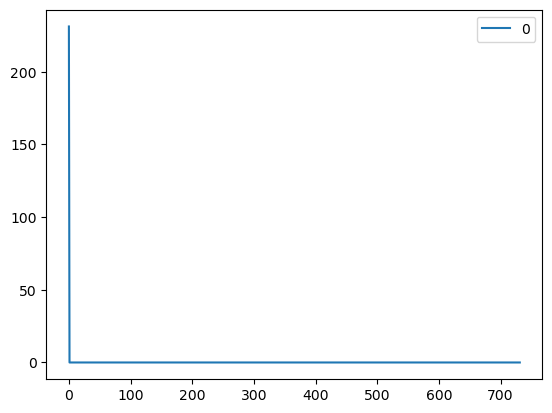

In [13]:
pdp.plot()

array([6.55377736e-003, 7.22906776e-005, 5.18519676e-010, 8.29627679e-012,
       3.20717286e-015, 9.24573186e-020, 4.36738540e-021, 2.59403342e-022,
       4.66525461e-026, 1.11176728e-025, 6.64044772e-031, 1.86834079e-029,
       2.64787329e-030, 1.31930252e-033, 3.33494278e-036, 1.98682438e-040,
       3.82327724e-042, 1.92127997e-044, 9.54467657e-049, 1.27806261e-052,
       2.50724690e-056, 2.65395025e-058, 2.48246885e-063, 3.34398346e-063,
       2.54622676e-066, 2.84406044e-068, 7.87832163e-070, 1.50617602e-073,
       2.50163572e-076, 1.13941769e-079, 5.51708774e-084, 6.39589695e-085,
       4.14050304e-087, 4.19698530e-090, 7.49394138e-089, 1.45572858e-090,
       4.89769573e-094, 5.74595453e-097, 3.55351530e-101, 1.37061105e-104,
       1.72024761e-106, 6.70150921e-111, 1.34151384e-115, 6.70780350e-121,
       4.00942567e-123, 9.35598741e-124, 1.07198190e-127, 4.83138610e-131,
       2.18478137e-137, 2.51039131e-140, 5.17439410e-142, 1.05221649e-143,
       5.48419546e-146, 3